## MNIST Data

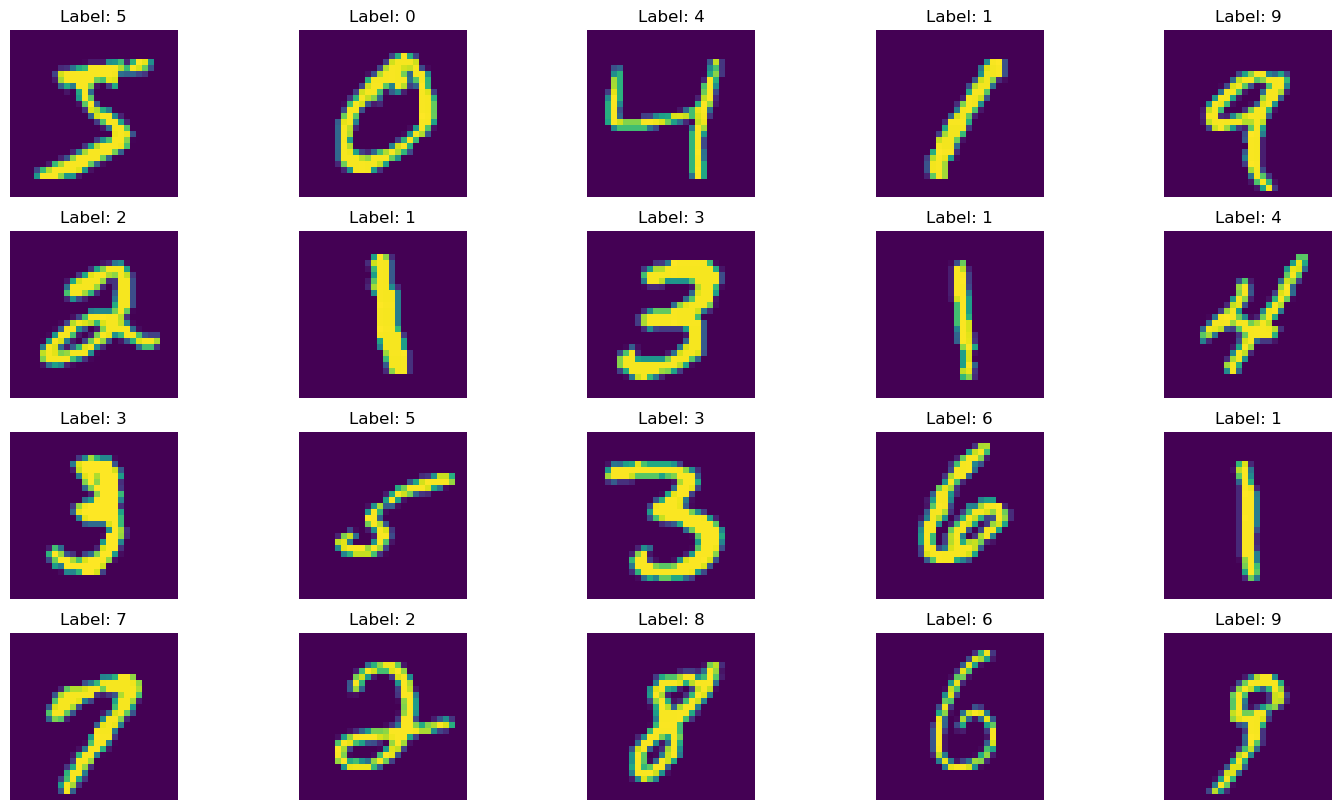

In [450]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the first 10 images
num_images = 20
plt.figure(figsize=(18, 10))
for i in range(num_images):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [451]:
x_train.shape

(60000, 28, 28)

In [452]:
y_train.shape

(60000,)

In [453]:
x_test.shape

(10000, 28, 28)

In [454]:
y_test.shape

(10000,)

In [455]:
x_train[1].shape

(28, 28)

In [456]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

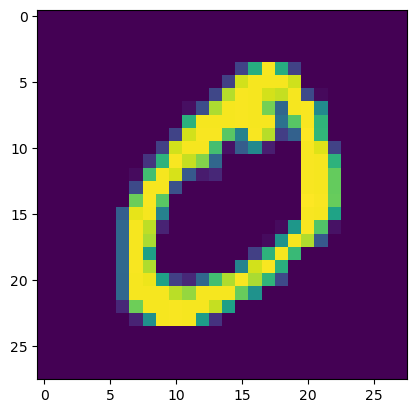

In [421]:
plt.imshow(x_train[1])

In [458]:
y_train[1]

0

# MLP

In [459]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import History
from tensorflow.keras.optimizers import Adam

# we are loading the MNIST data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # there we are normalizing the pixels between 0 and 1
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [460]:
# Creating a simple neural network for the prediction of neural network

model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

# Use catergorical cross entropy as the loss function.
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train_categorical, epochs=15, validation_split=0.1, verbose=1)

test_loss, test_acc = model.evaluate(x_test, y_test_categorical)
print("Test accuracy:", test_acc * 100)
print('Test loss:', test_loss)

/Users/pradyot/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8724 - loss: 0.4326 - val_accuracy: 0.9693 - val_loss: 0.0998
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9639 - loss: 0.1241 - val_accuracy: 0.9680 - val_loss: 0.1120
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9759 - loss: 0.0818 - val_accuracy: 0.9752 - val_loss: 0.0897
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9812 - loss: 0.0648 - val_accuracy: 0.9797 - val_loss: 0.0685
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9850 - loss: 0.0487 - val_accuracy: 0.9760 - val_loss: 0.0912
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9879 - loss: 0.0406 - val_accuracy: 0.9763 - val_loss: 0.0848
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9881 - loss: 0.0392 - val_accuracy: 0.9780 - val_loss: 0.0904
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9902 - loss: 0.0306 

In [472]:
x_test.shape

(10000, 28, 28, 1)

In [473]:
x_test[test_acc < 0.99].shape

(1, 10000, 28, 28, 1)

In [474]:
model.summary()

Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_65 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_376 (Dense)               │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_377 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_378 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_379 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_130         │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_380 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_131         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_381 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,731,200 (6.60 MB)

 Trainable params: 577,002 (2.20 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 1,154,006 (4.40 MB)

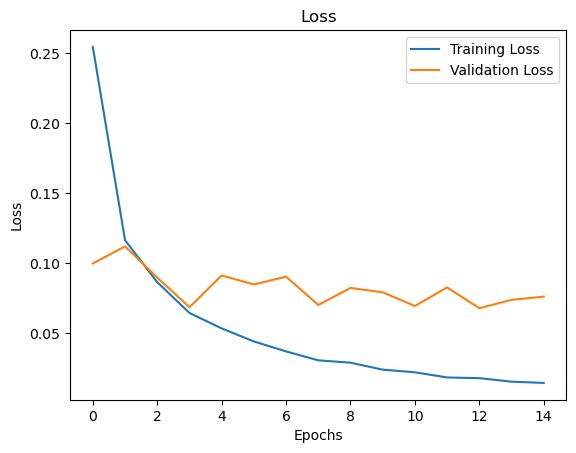

In [475]:
# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Title and labels
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


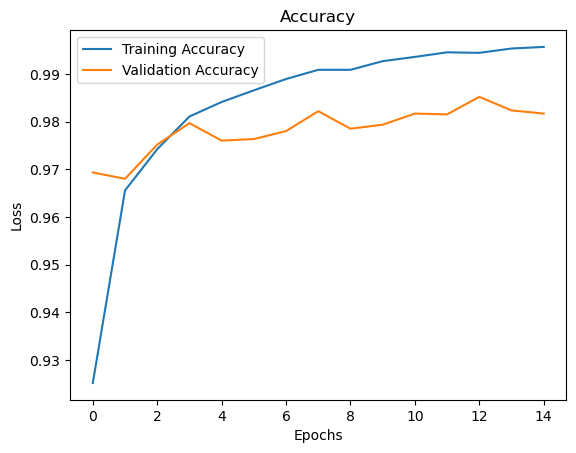

In [476]:
# Plot training loss and validation loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Title and labels
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 1st layer

<Dense name=dense_376, built=True>
dense_layer_weights shape:  (784, 512)
num_filters:  512


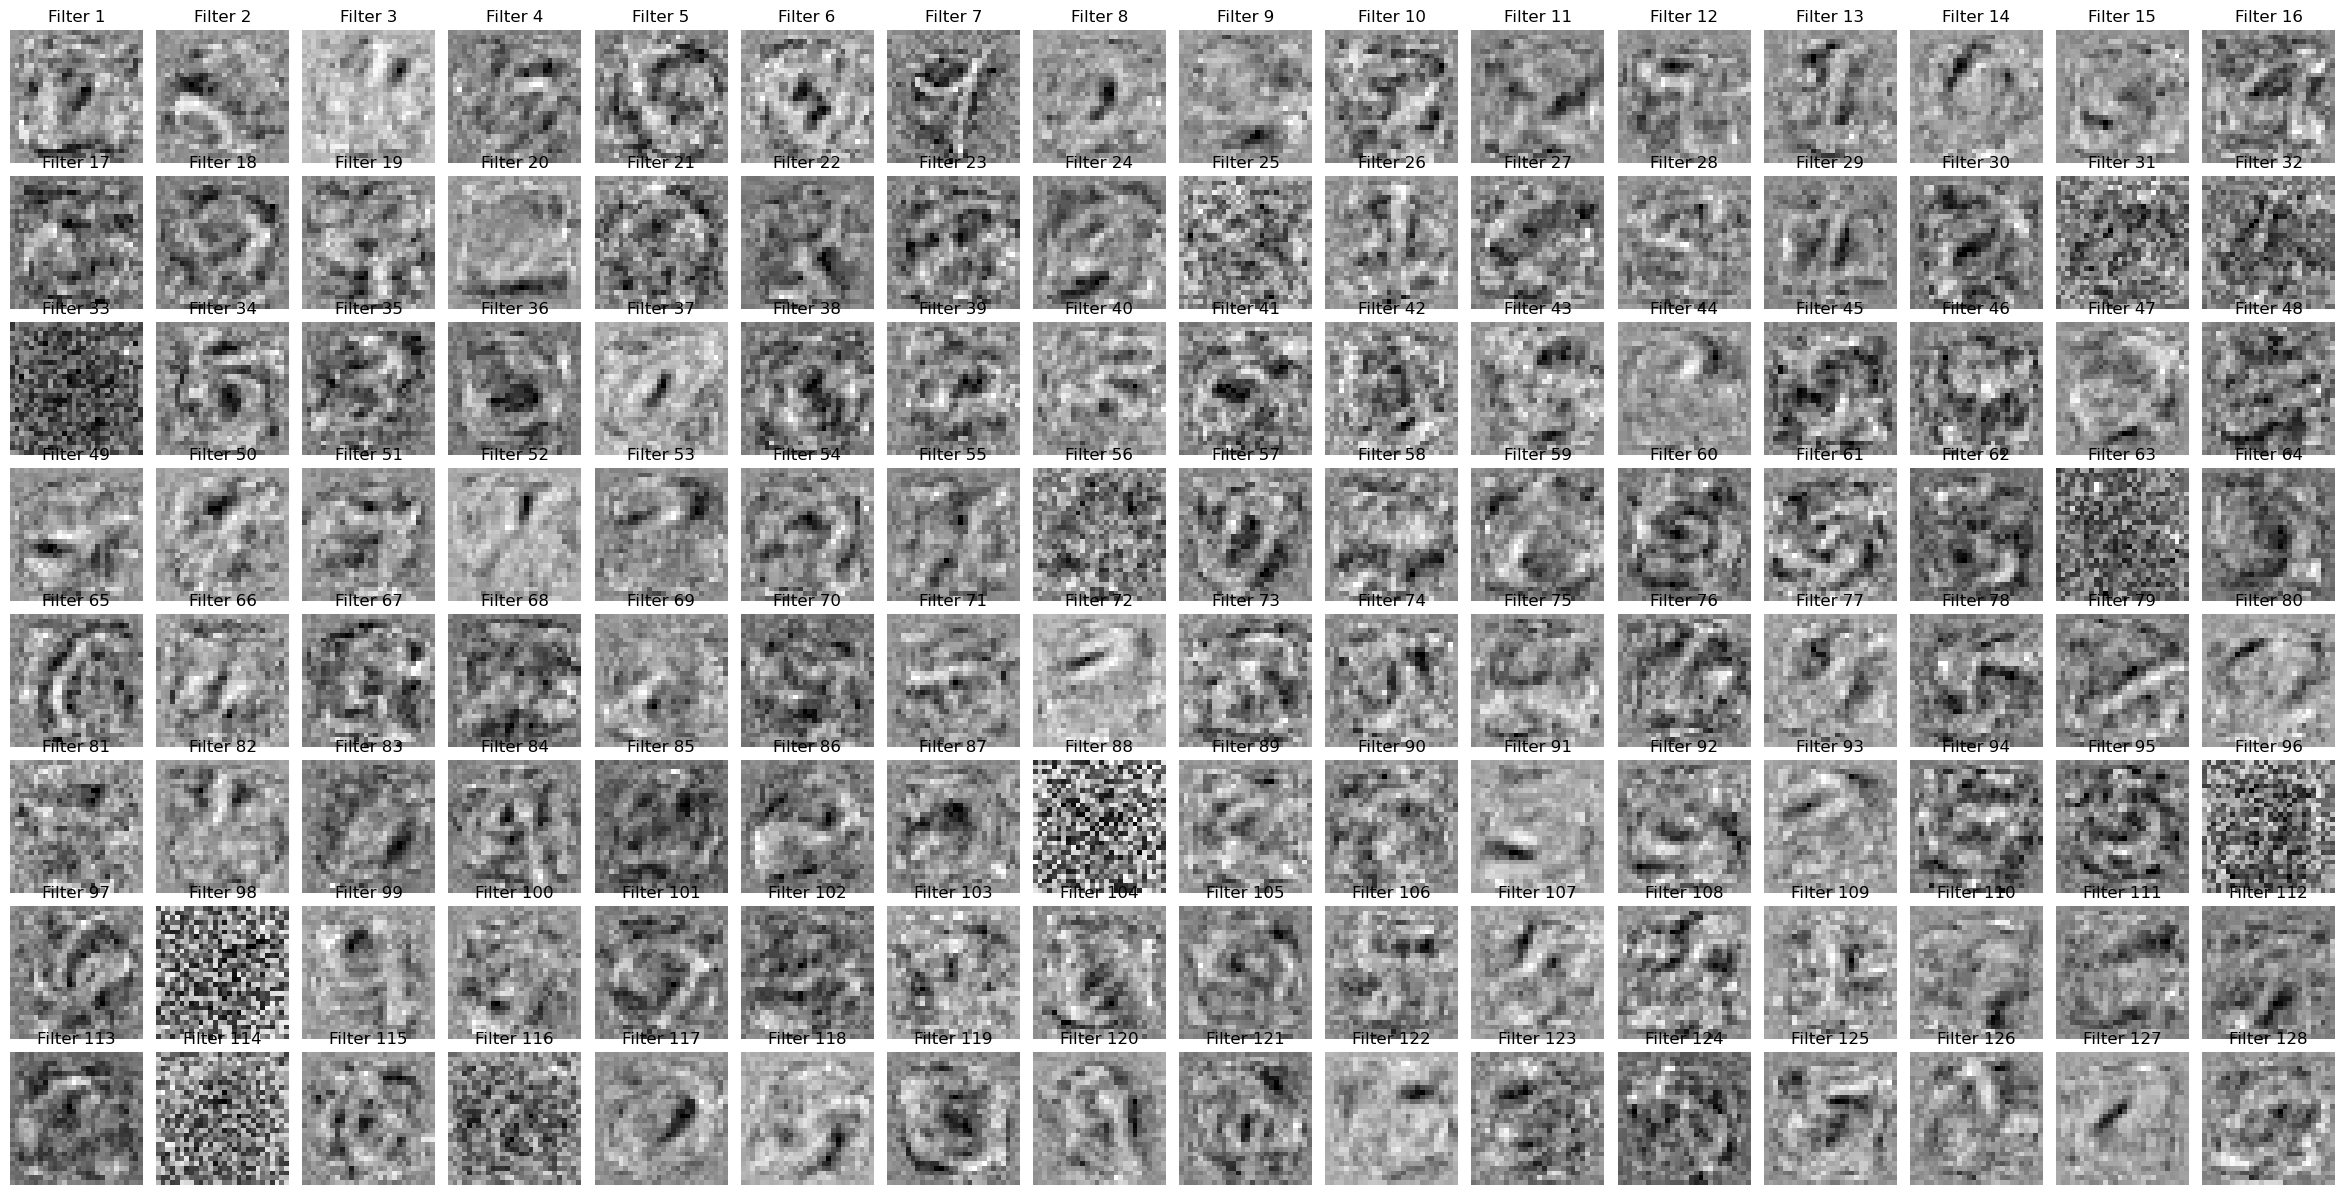

In [477]:
def visualize_filters(model, figsize=(20, 10), subplot_size=(2, 5), spacing=0.1):
    # extracting the weight of the first dense layer
    dense_layer_weights = model.layers[1].get_weights()[0]
    print(model.layers[1])
    print('dense_layer_weights shape: ',dense_layer_weights.shape)
    
    # find the total no. of filters and rows
    num_filters = dense_layer_weights.shape[1]
    print('num_filters: ',num_filters)
    num_rows = subplot_size[0]
    num_cols = subplot_size[1]
    
    # Ensure the number of subplots does not exceed the number of filters
    num_subplots = min(num_filters, num_rows * num_cols)
    
    # Calculate the size of each subplot
    subplot_width = (figsize[0] - (num_cols - 1) * spacing) / num_cols
    subplot_height = (figsize[1] - (num_rows - 1) * spacing) / num_rows
    
    # Plot the filters
    plt.figure(figsize=figsize)
    for i in range(num_subplots):
        row = i // num_cols
        col = i % num_cols
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(dense_layer_weights[:, i].reshape(28, 28), cmap='gray')
        plt.title(f'Filter {i+1}')
        plt.axis('off')

    plt.subplots_adjust(wspace=spacing, hspace=spacing)
    plt.show()

# Visualize filters with larger individual subplots and spacing between them
visualize_filters(model, figsize=(30, 15), subplot_size=(8, 16), spacing=0.1)


## 2nd layer

num_filters:  256


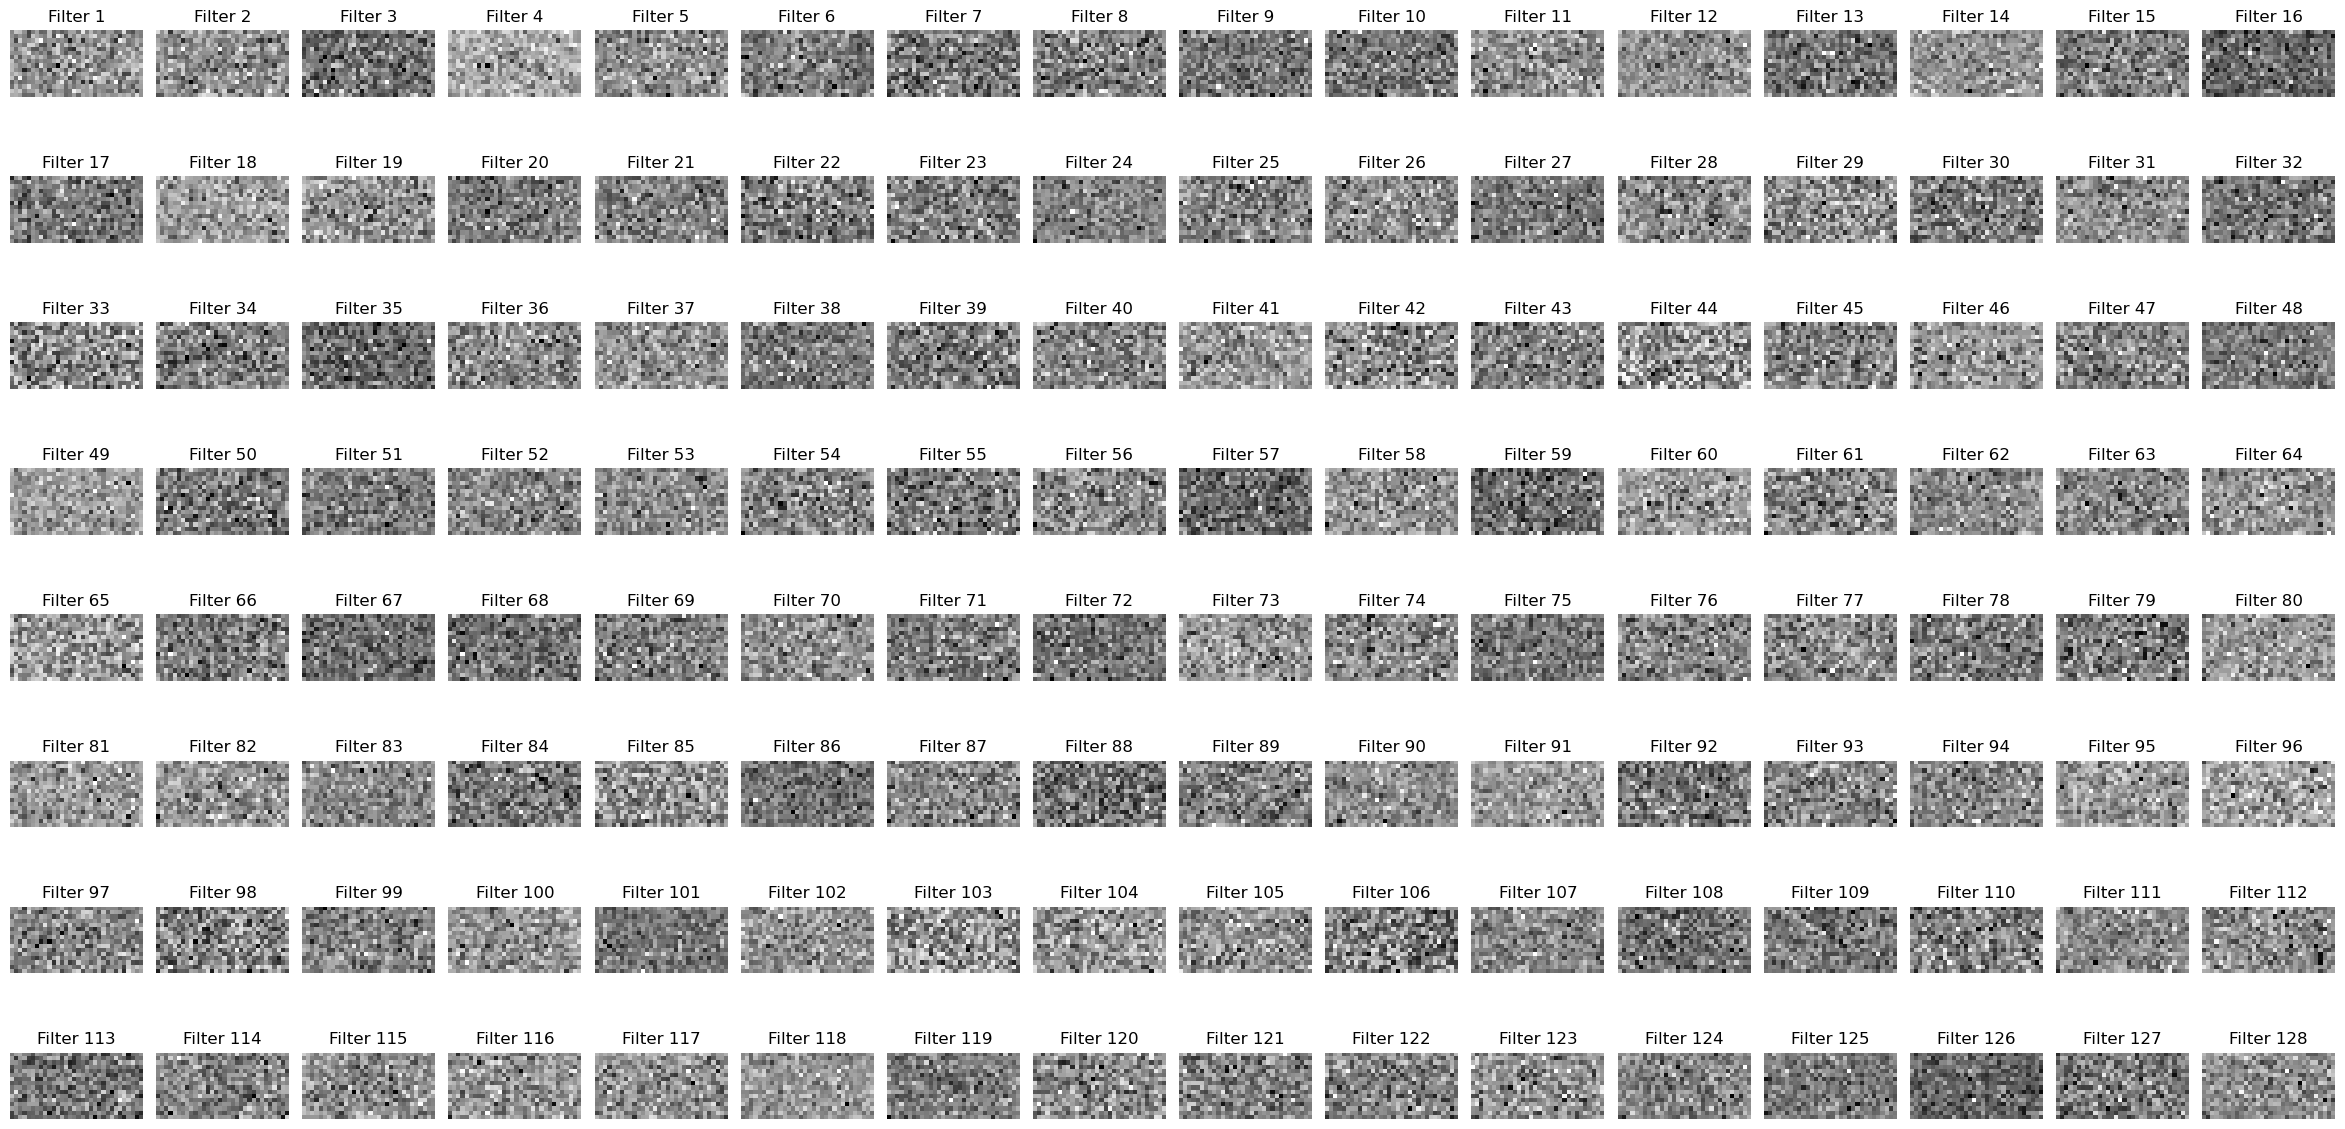

In [478]:
def visualize_filters(model, layer_index, figsize=(20, 10), subplot_size=(2, 5), spacing=0.1):
    # Get the weights of the second dense layer
    dense_layer_weights = model.layers[2].get_weights()[0]
    
    # find the total no. of filters and rows
    num_filters = dense_layer_weights.shape[1]
    print('num_filters: ',num_filters)
    num_rows = subplot_size[0]
    num_cols = subplot_size[1]
    
    
    num_subplots = min(num_filters, num_rows * num_cols)
    
    # Calculate the size of each subplot
    subplot_width = (figsize[0] - (num_cols - 1) * spacing) / num_cols
    subplot_height = (figsize[1] - (num_rows - 1) * spacing) / num_rows
    
    # Plot the filters
    plt.figure(figsize=figsize)
    for i in range(num_subplots):
        row = i // num_cols
        col = i % num_cols
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(dense_layer_weights[:, i].reshape(16, 32), cmap='gray')  # Adjust the reshape size according to the number of neurons in the second dense layer
        plt.title(f'Filter {i+1}')
        plt.axis('off')

    plt.subplots_adjust(wspace=spacing, hspace=spacing)
    plt.show()

# Visualize filters of the second dense layer with larger individual subplots and spacing between them
visualize_filters(model, layer_index=2, figsize=(30, 15), subplot_size=(8, 16), spacing=0.1)


### confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


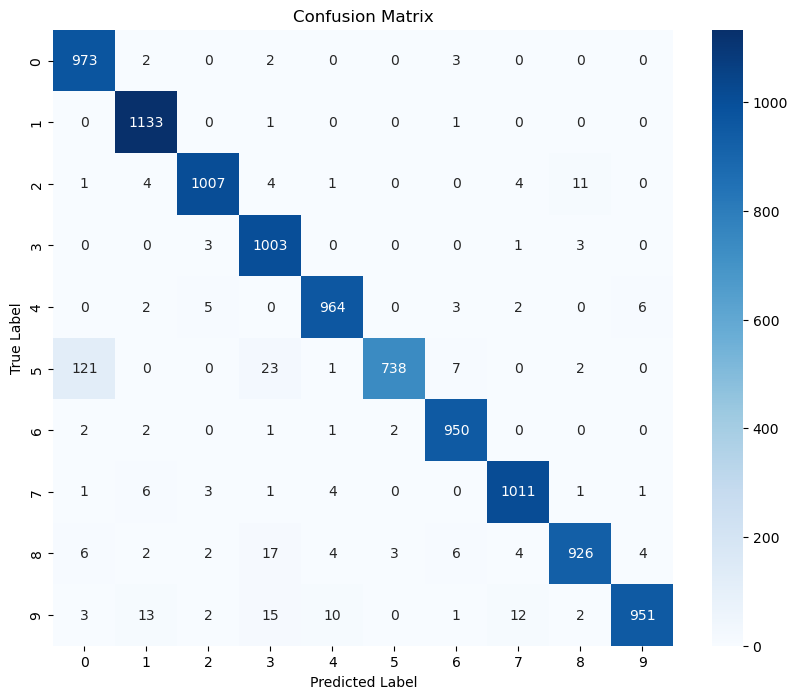

In [442]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted classes for the test set
predicted_classes = np.argmax(model.predict(x_test), axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Misclassification

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Index: 104
Predicted class: 5
Actual class: 9


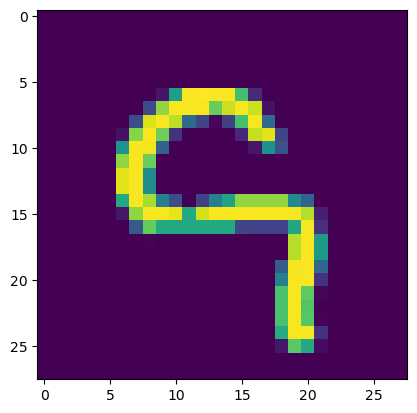

Index: 115
Predicted class: 9
Actual class: 4


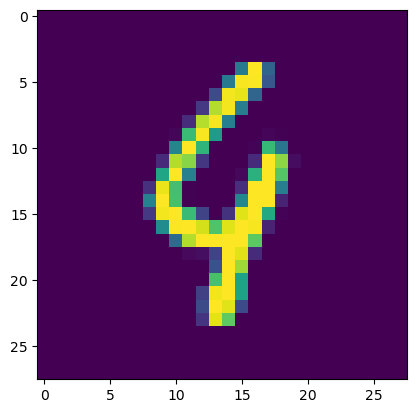

Index: 149
Predicted class: 3
Actual class: 2


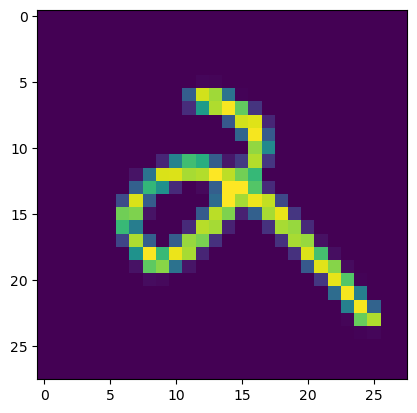

Index: 151
Predicted class: 8
Actual class: 9


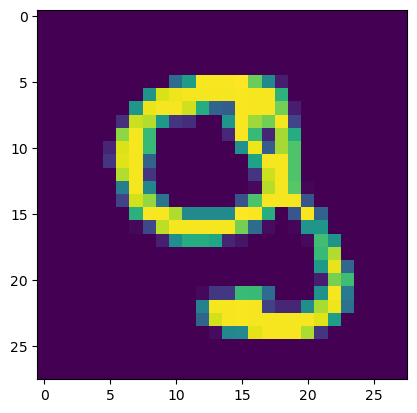

Index: 200
Predicted class: 8
Actual class: 3


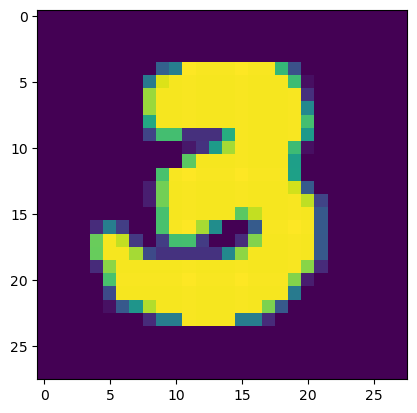

Index: 247
Predicted class: 2
Actual class: 4


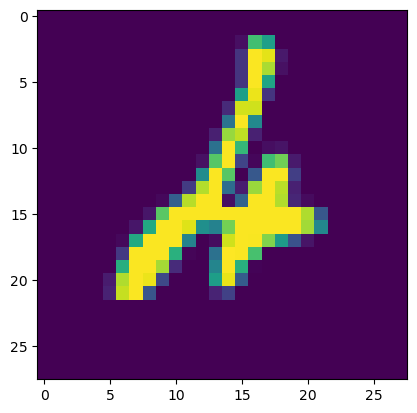

Index: 340
Predicted class: 3
Actual class: 5


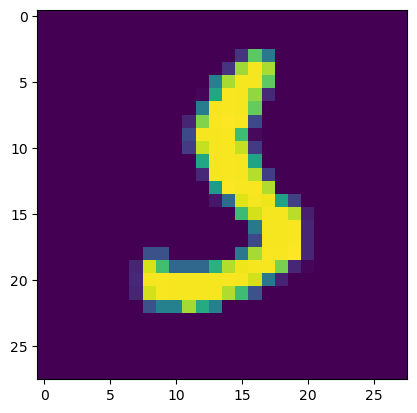

Index: 381
Predicted class: 7
Actual class: 3


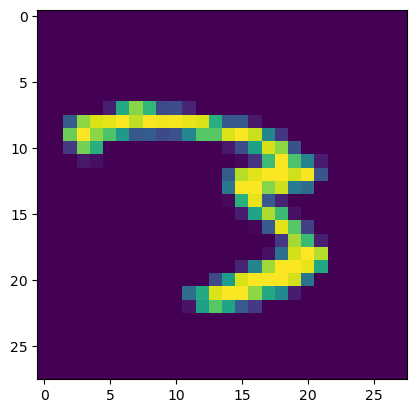

Index: 445
Predicted class: 0
Actual class: 6


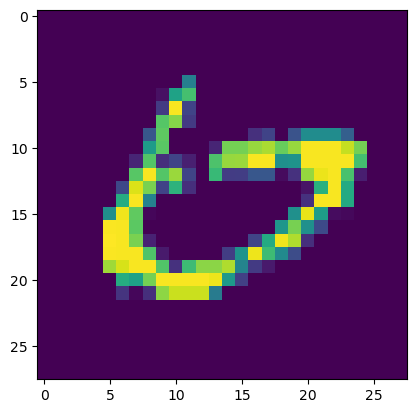

Index: 582
Predicted class: 2
Actual class: 8


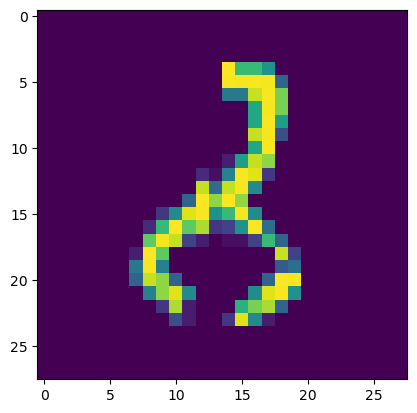

Index: 619
Predicted class: 2
Actual class: 1


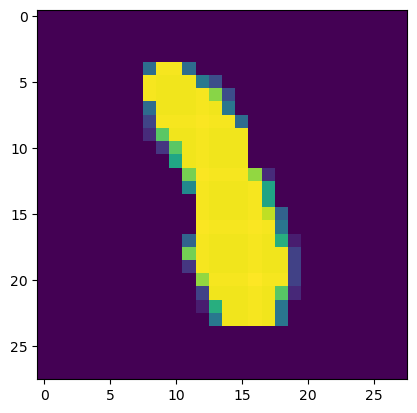

Index: 674
Predicted class: 3
Actual class: 5


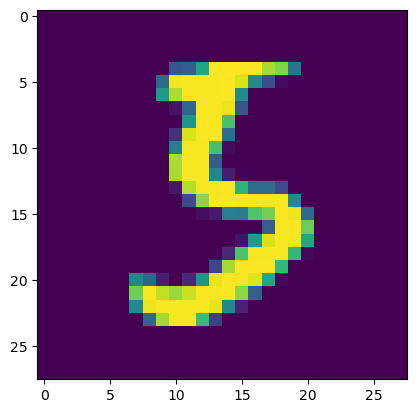

Index: 691
Predicted class: 4
Actual class: 8


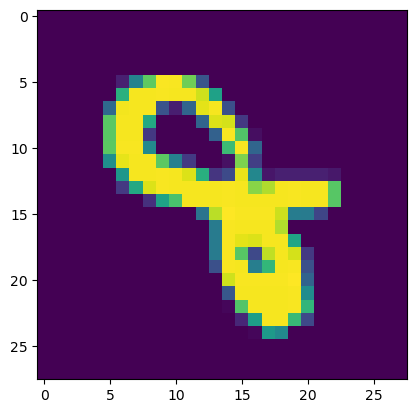

Index: 720
Predicted class: 8
Actual class: 5


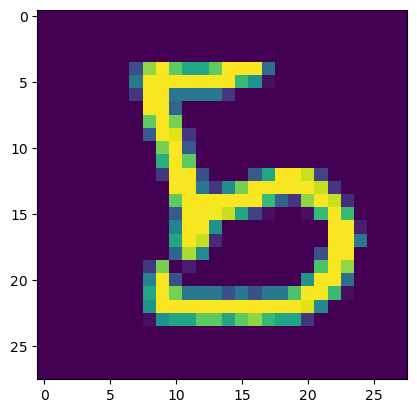

Index: 846
Predicted class: 9
Actual class: 7


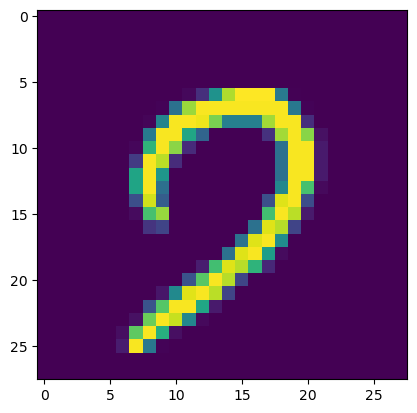

Index: 938
Predicted class: 5
Actual class: 3


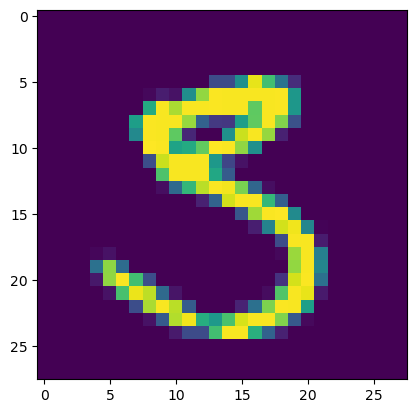

Index: 947
Predicted class: 9
Actual class: 8


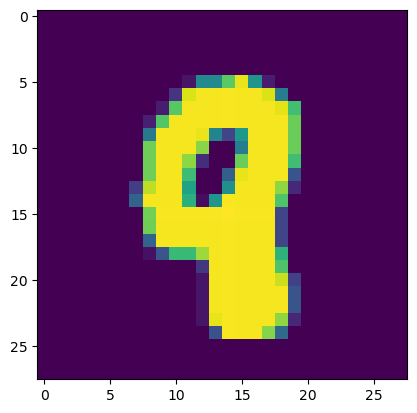

Index: 951
Predicted class: 4
Actual class: 5


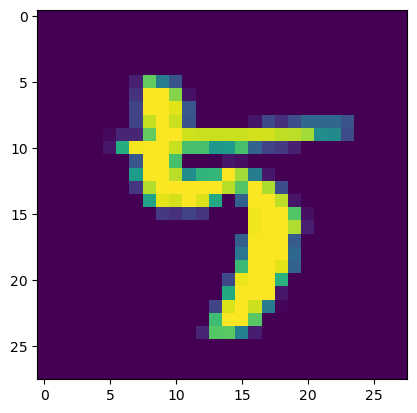

Index: 1014
Predicted class: 5
Actual class: 6


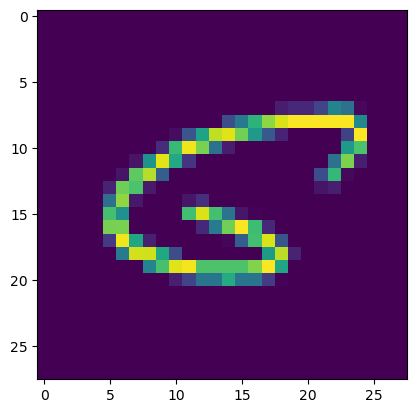

Index: 1039
Predicted class: 2
Actual class: 7


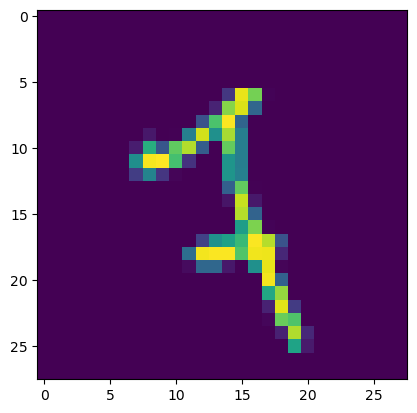

Index: 1112
Predicted class: 6
Actual class: 4


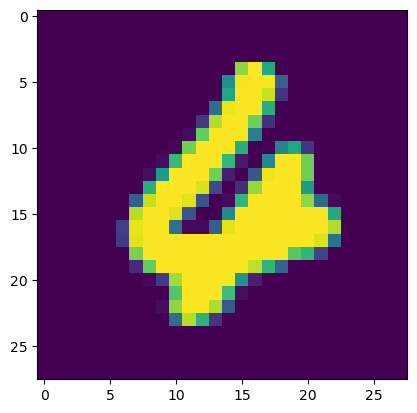

Index: 1147
Predicted class: 7
Actual class: 4


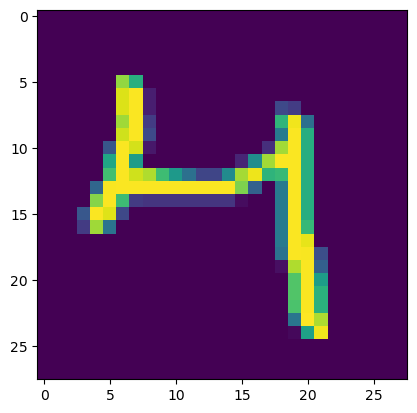

Index: 1156
Predicted class: 8
Actual class: 7


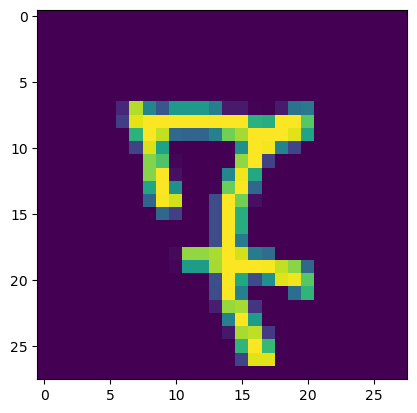

Index: 1166
Predicted class: 2
Actual class: 3


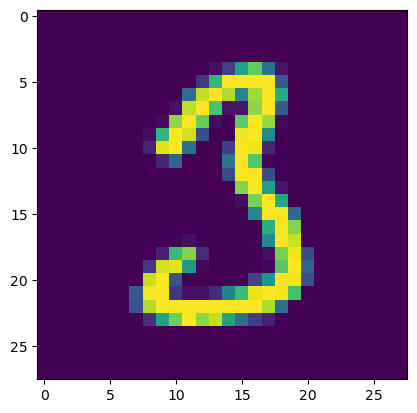

Index: 1181
Predicted class: 1
Actual class: 6


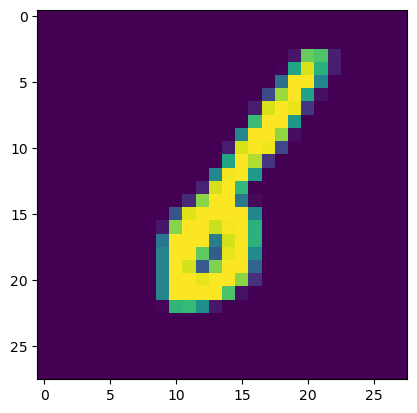

Index: 1182
Predicted class: 5
Actual class: 6


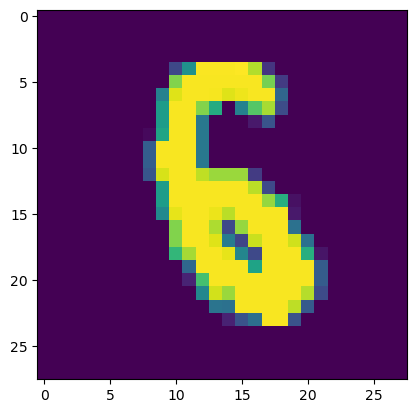

Index: 1226
Predicted class: 2
Actual class: 7


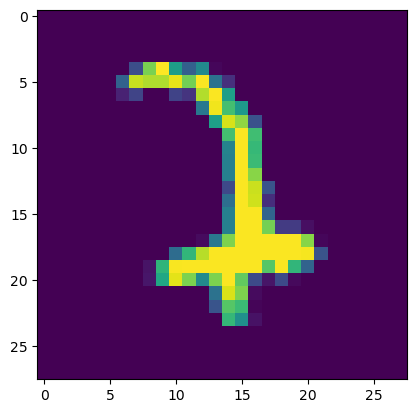

Index: 1232
Predicted class: 4
Actual class: 9


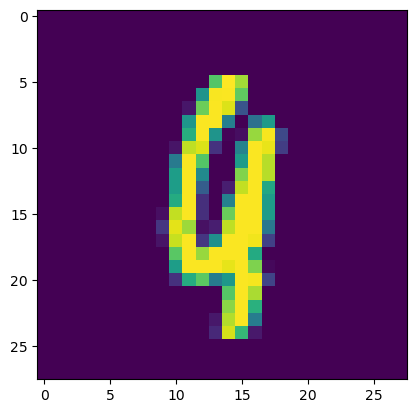

Index: 1242
Predicted class: 9
Actual class: 4


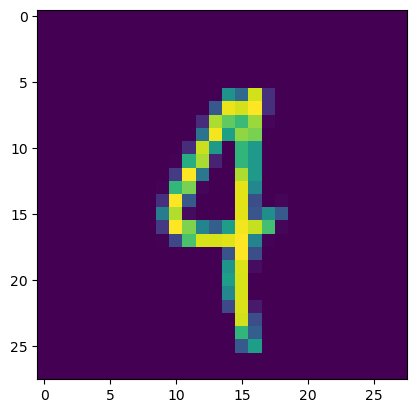

Index: 1247
Predicted class: 2
Actual class: 9


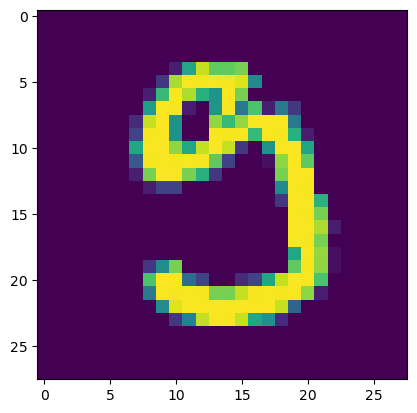

Index: 1260
Predicted class: 1
Actual class: 7


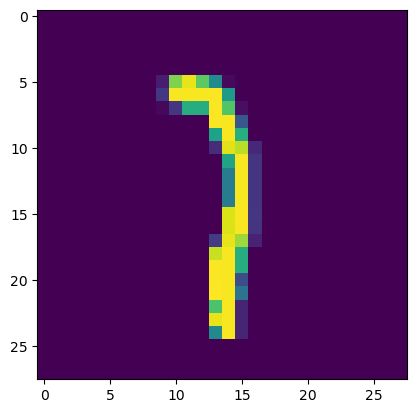

Index: 1289
Predicted class: 3
Actual class: 5


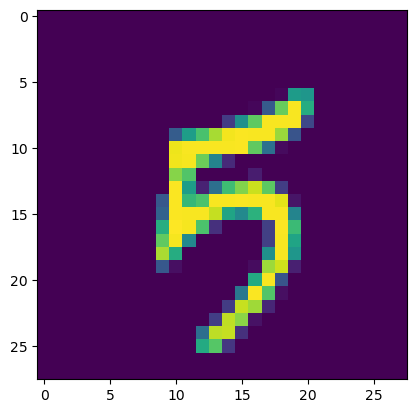

Index: 1292
Predicted class: 5
Actual class: 6


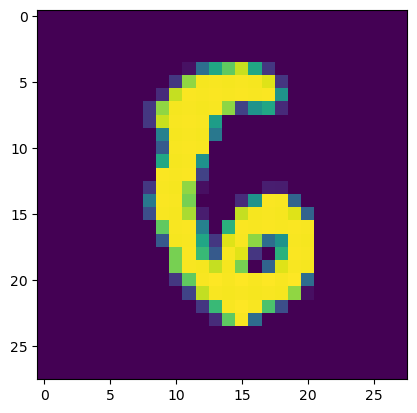

Index: 1299
Predicted class: 7
Actual class: 5


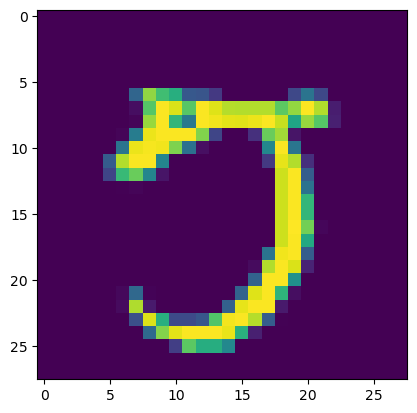

Index: 1319
Predicted class: 0
Actual class: 8


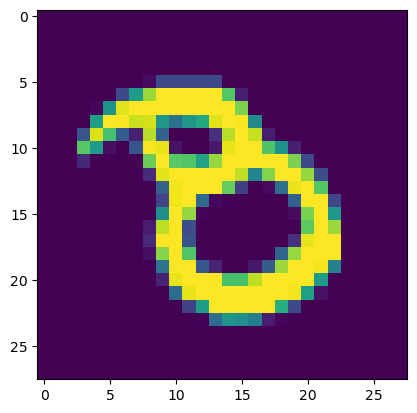

Index: 1328
Predicted class: 9
Actual class: 7


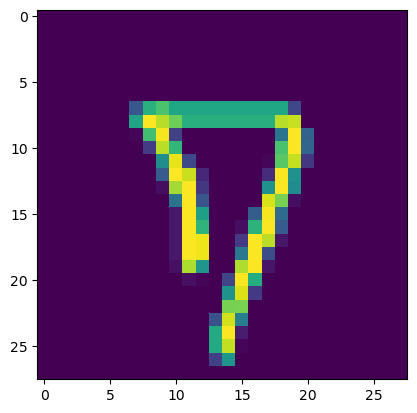

Index: 1378
Predicted class: 6
Actual class: 5


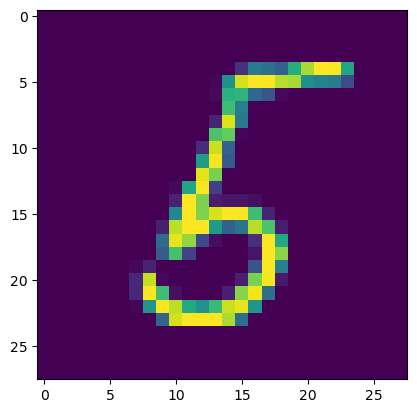

Index: 1394
Predicted class: 3
Actual class: 8


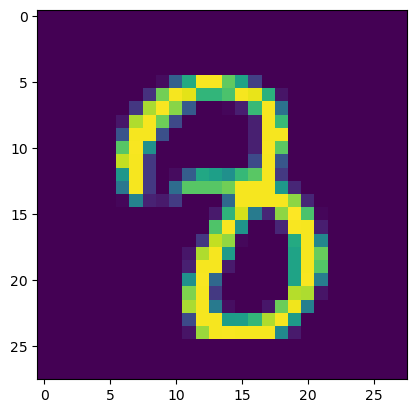

Index: 1425
Predicted class: 4
Actual class: 8


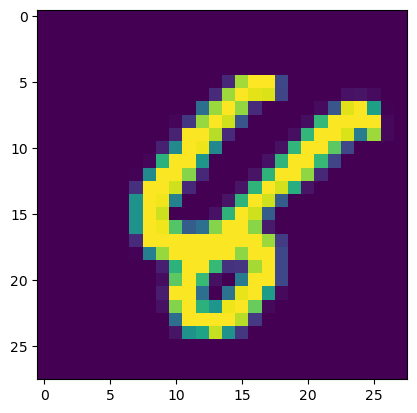

Index: 1482
Predicted class: 5
Actual class: 6


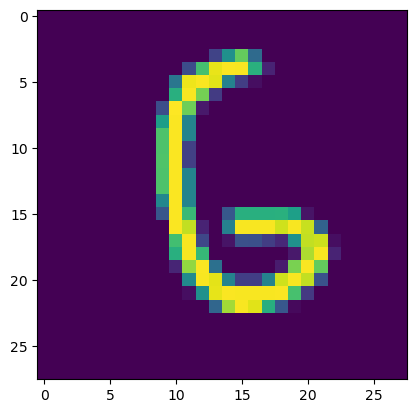

Index: 1522
Predicted class: 9
Actual class: 7


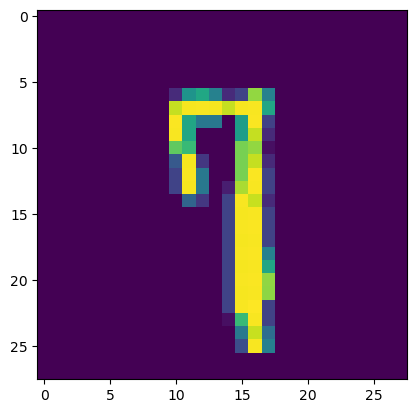

Index: 1530
Predicted class: 7
Actual class: 8


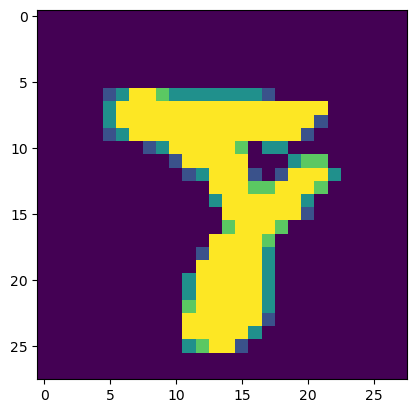

Index: 1549
Predicted class: 6
Actual class: 4


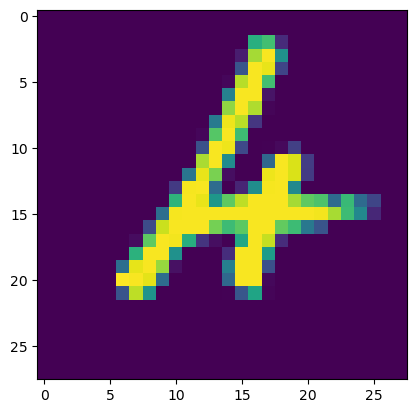

Index: 1609
Predicted class: 3
Actual class: 2


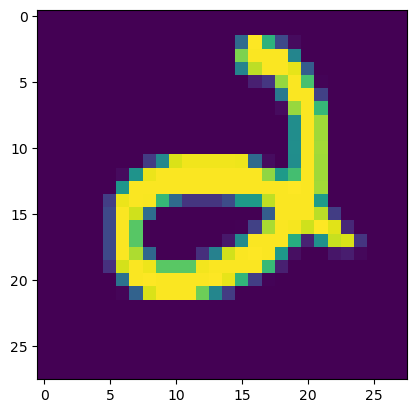

Index: 1681
Predicted class: 7
Actual class: 3


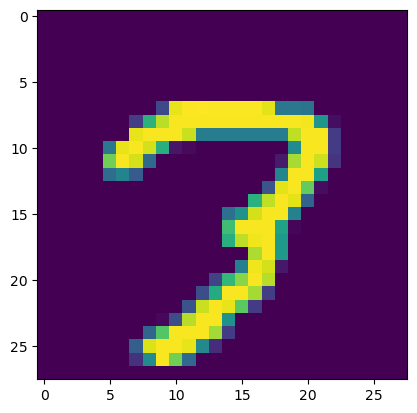

Index: 1901
Predicted class: 4
Actual class: 9


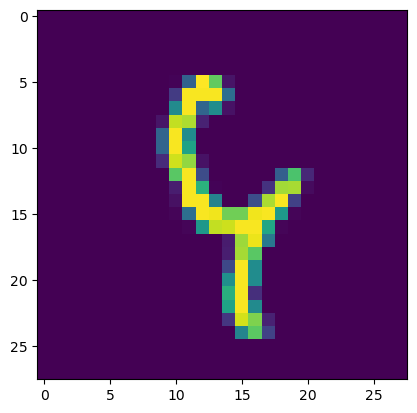

Index: 1913
Predicted class: 2
Actual class: 3


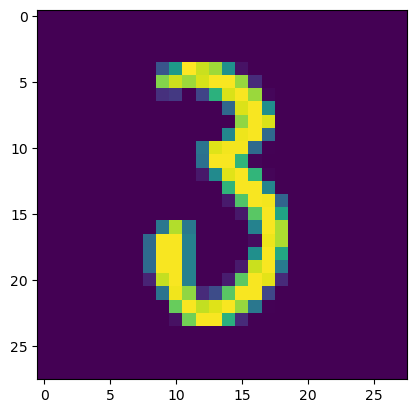

Index: 1941
Predicted class: 2
Actual class: 7


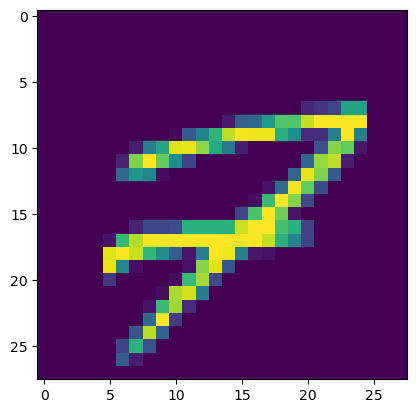

Index: 2024
Predicted class: 9
Actual class: 7


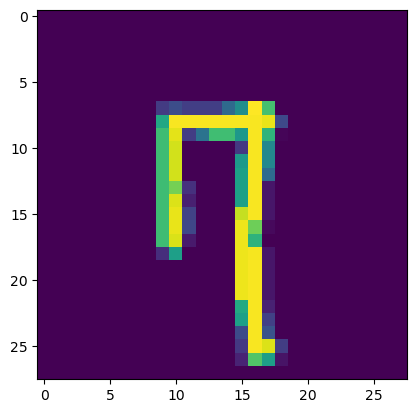

Index: 2035
Predicted class: 3
Actual class: 5


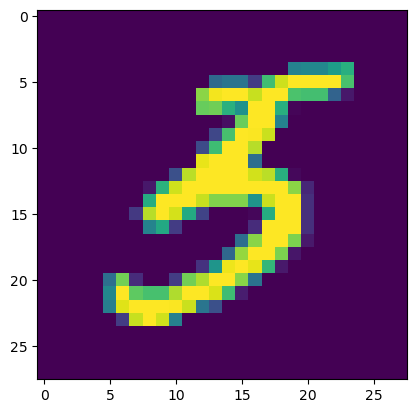

Index: 2052
Predicted class: 4
Actual class: 8


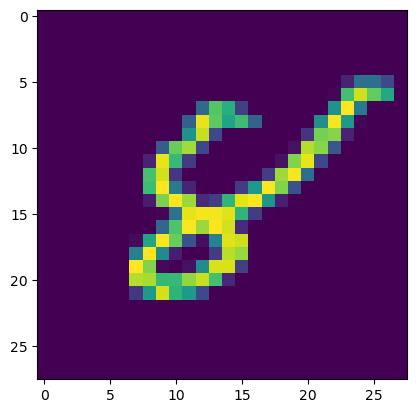

Index: 2053
Predicted class: 9
Actual class: 4


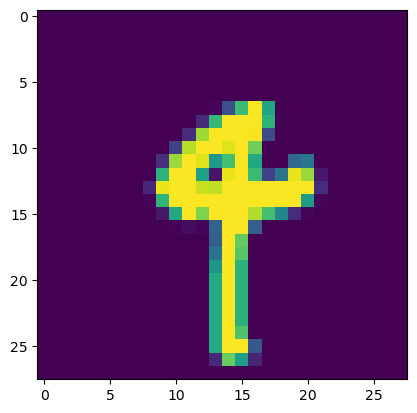

Index: 2070
Predicted class: 9
Actual class: 7


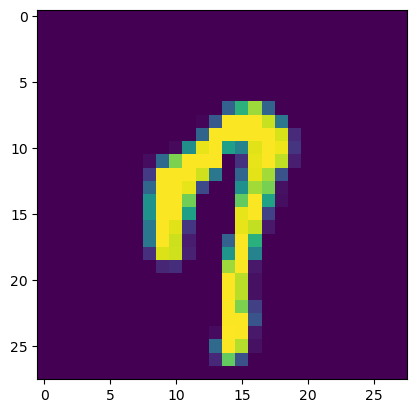

Index: 2073
Predicted class: 0
Actual class: 5


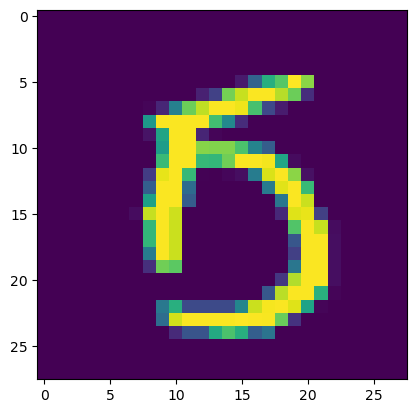

Index: 2093
Predicted class: 1
Actual class: 8


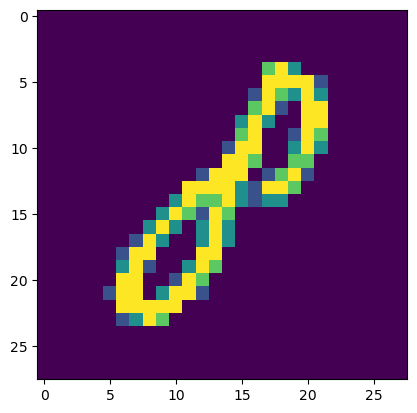

Index: 2109
Predicted class: 2
Actual class: 3


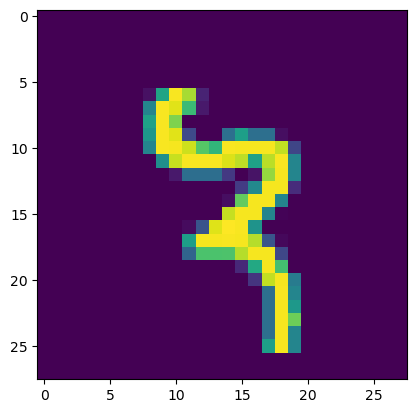

Index: 2118
Predicted class: 0
Actual class: 6


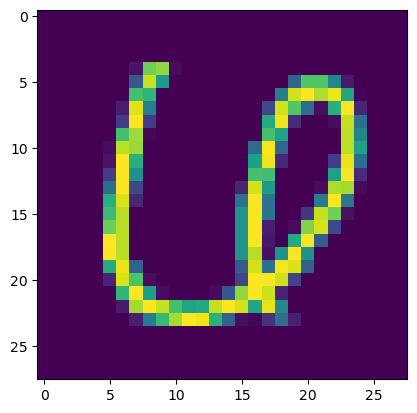

Index: 2130
Predicted class: 9
Actual class: 4


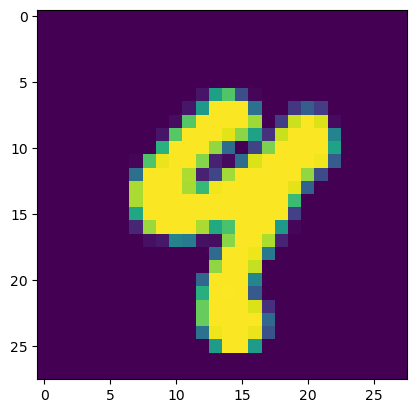

Index: 2135
Predicted class: 1
Actual class: 6


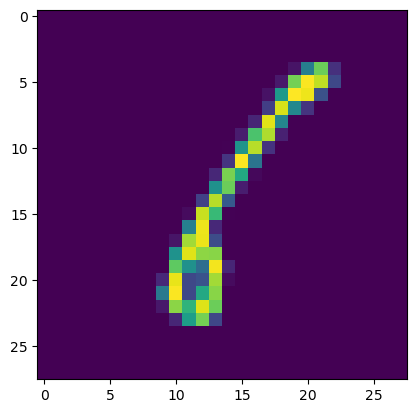

Index: 2168
Predicted class: 2
Actual class: 8


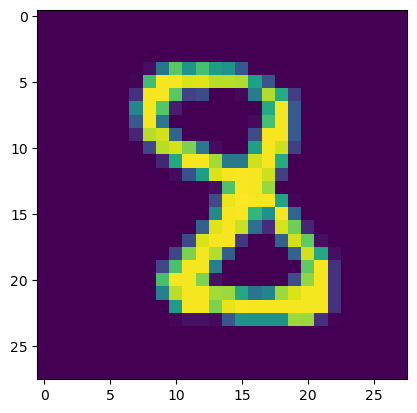

Index: 2224
Predicted class: 8
Actual class: 5


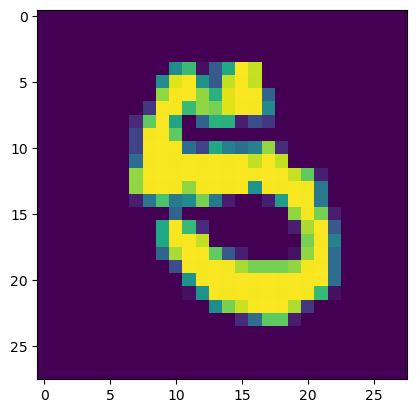

Index: 2272
Predicted class: 0
Actual class: 8


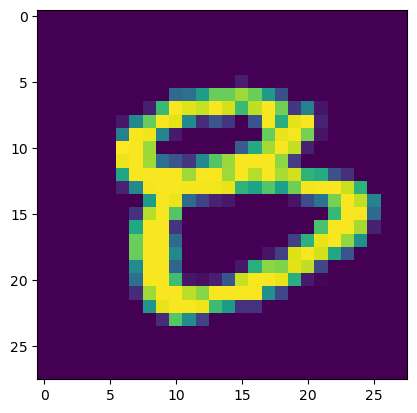

Index: 2293
Predicted class: 0
Actual class: 9


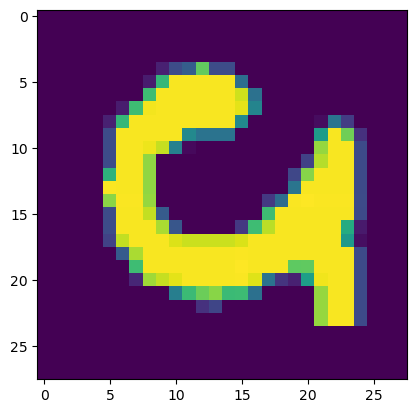

Index: 2387
Predicted class: 1
Actual class: 9


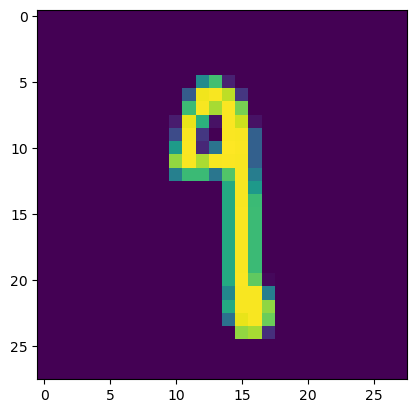

Index: 2406
Predicted class: 8
Actual class: 9


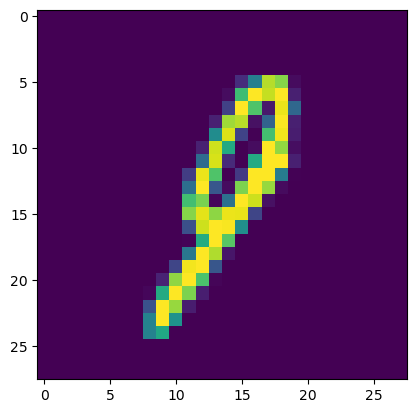

Index: 2408
Predicted class: 5
Actual class: 3


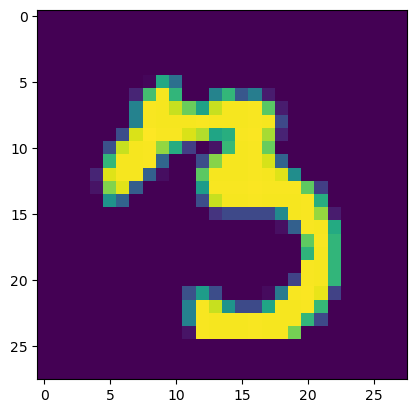

Index: 2414
Predicted class: 4
Actual class: 9


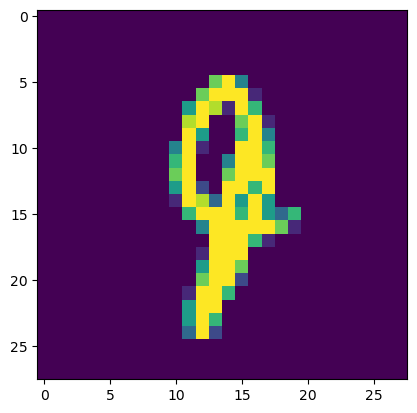

Index: 2447
Predicted class: 9
Actual class: 4


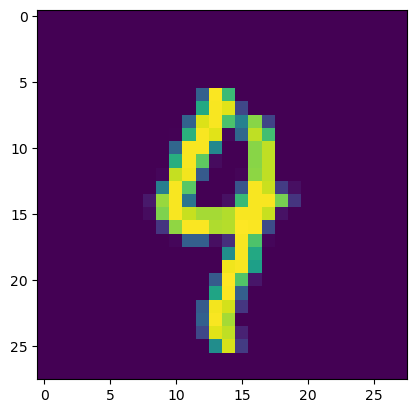

Index: 2488
Predicted class: 4
Actual class: 2


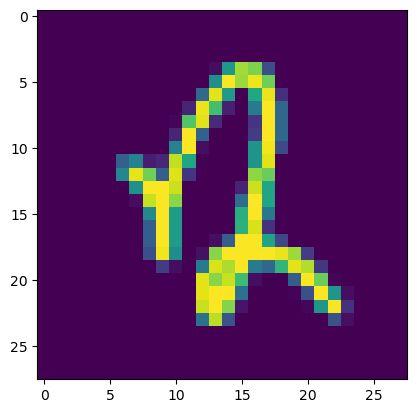

Index: 2597
Predicted class: 3
Actual class: 5


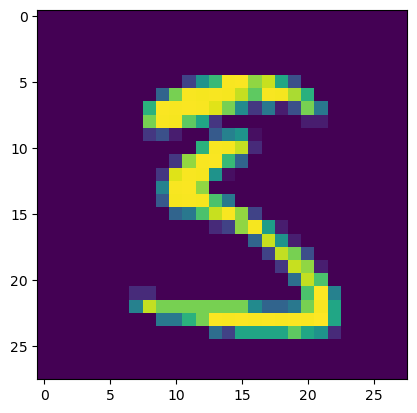

Index: 2607
Predicted class: 1
Actual class: 7


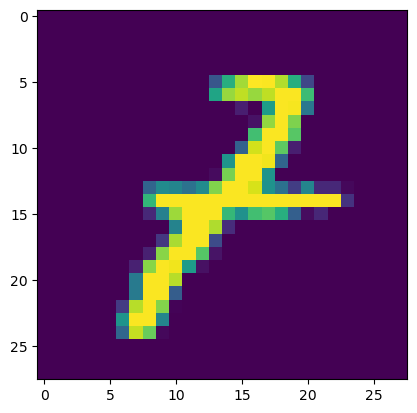

Index: 2648
Predicted class: 0
Actual class: 9


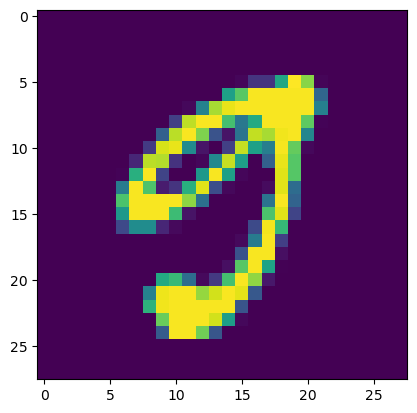

Index: 2654
Predicted class: 1
Actual class: 6


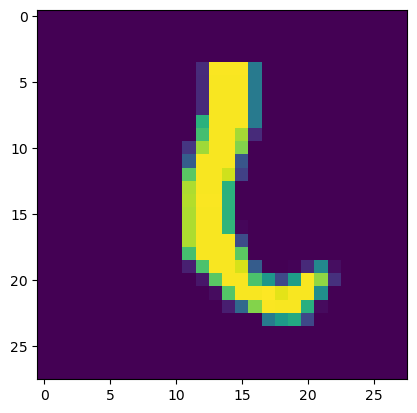

Index: 2684
Predicted class: 0
Actual class: 3


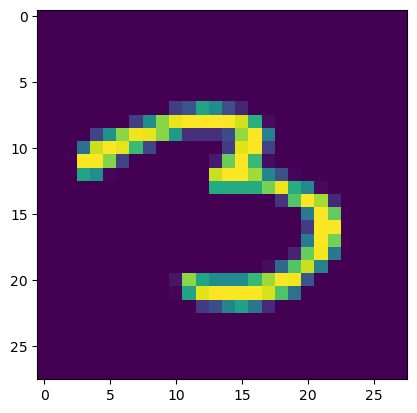

Index: 2860
Predicted class: 5
Actual class: 6


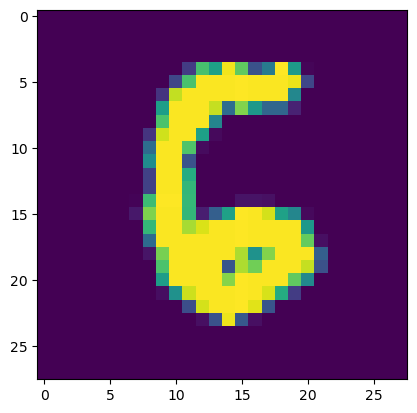

Index: 2877
Predicted class: 7
Actual class: 4


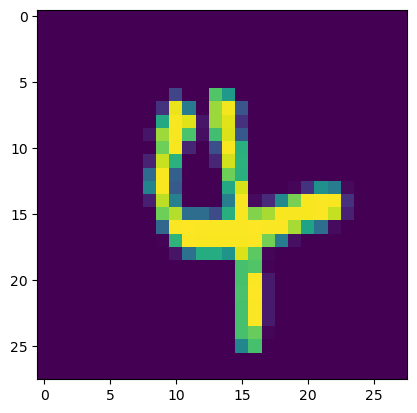

Index: 2921
Predicted class: 2
Actual class: 3


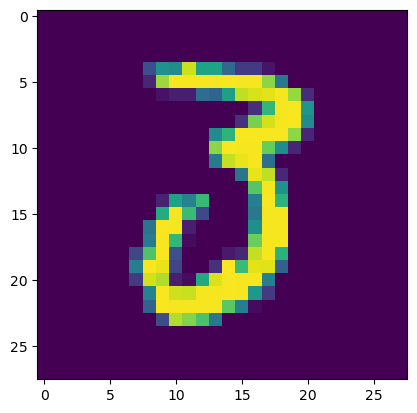

Index: 2927
Predicted class: 2
Actual class: 3


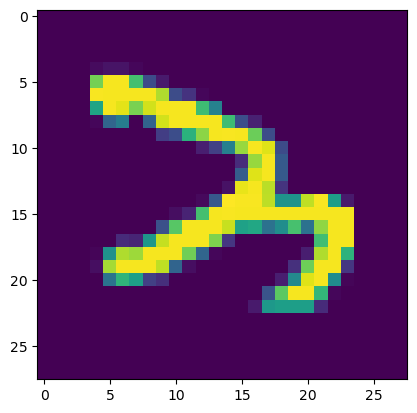

Index: 2939
Predicted class: 7
Actual class: 9


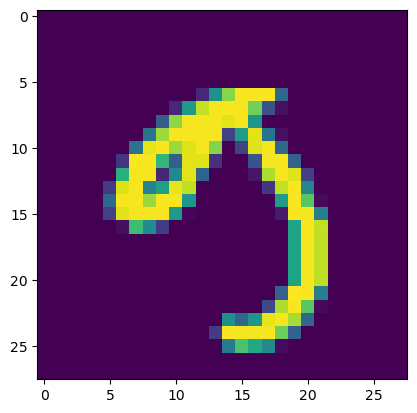

Index: 2953
Predicted class: 5
Actual class: 3


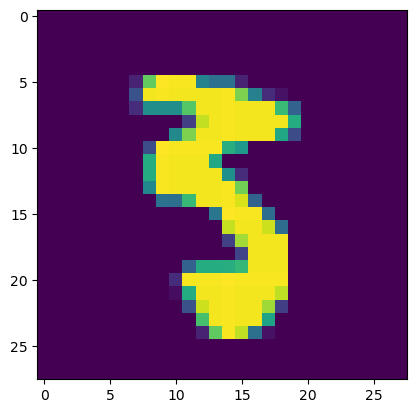

Index: 2995
Predicted class: 5
Actual class: 6


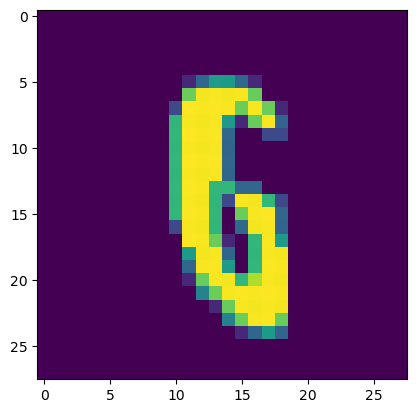

Index: 3073
Predicted class: 2
Actual class: 1


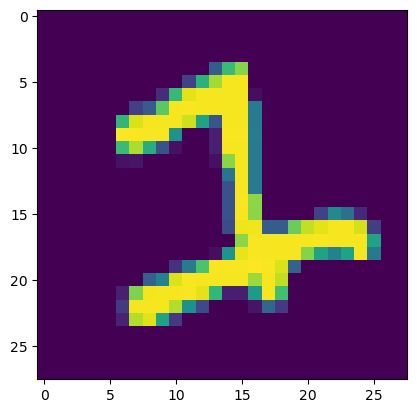

Index: 3117
Predicted class: 9
Actual class: 5


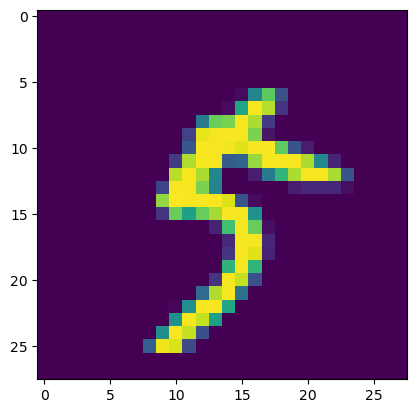

Index: 3225
Predicted class: 9
Actual class: 7


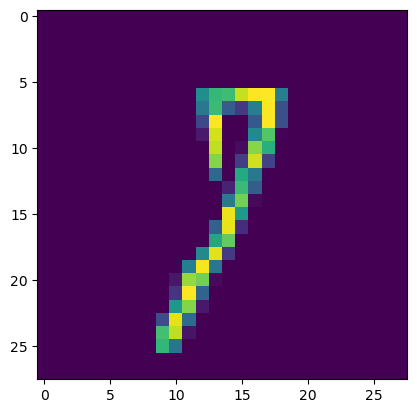

Index: 3422
Predicted class: 0
Actual class: 6


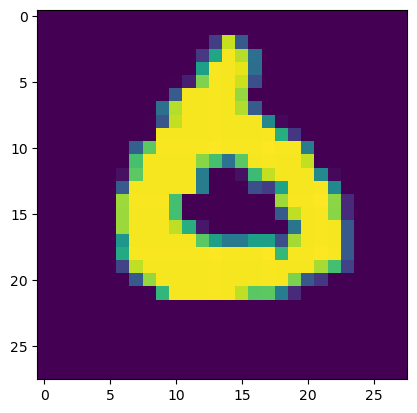

Index: 3475
Predicted class: 7
Actual class: 3


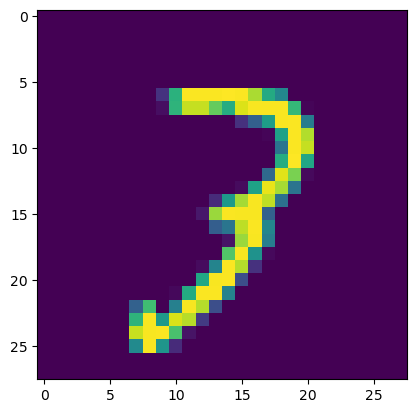

Index: 3503
Predicted class: 1
Actual class: 9


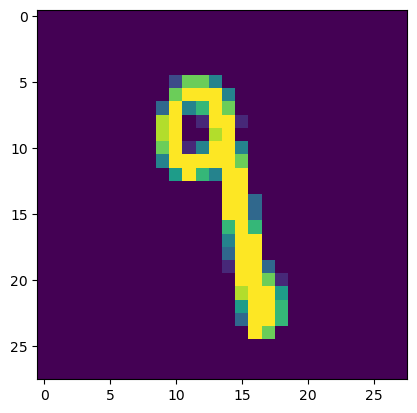

Index: 3520
Predicted class: 4
Actual class: 6


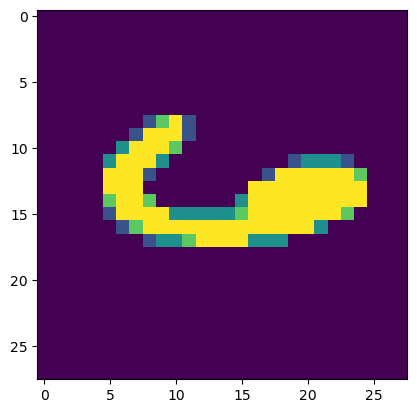

Index: 3549
Predicted class: 2
Actual class: 3


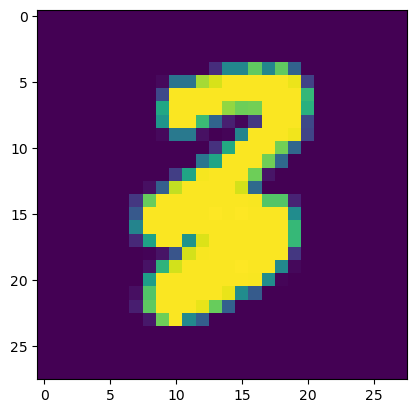

Index: 3558
Predicted class: 0
Actual class: 5


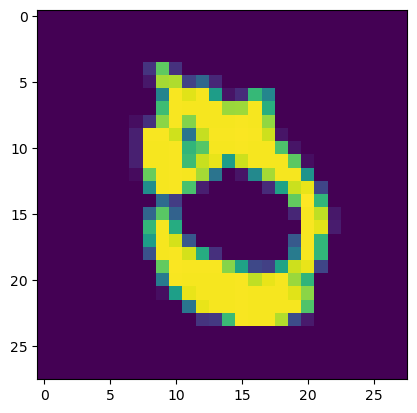

Index: 3597
Predicted class: 3
Actual class: 9


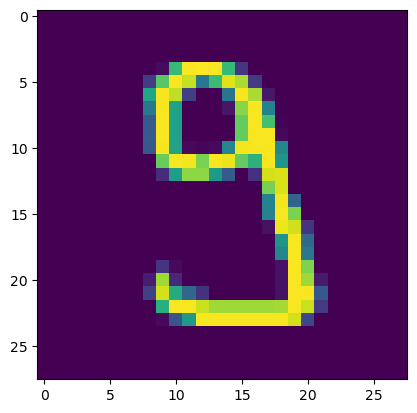

Index: 3607
Predicted class: 9
Actual class: 4


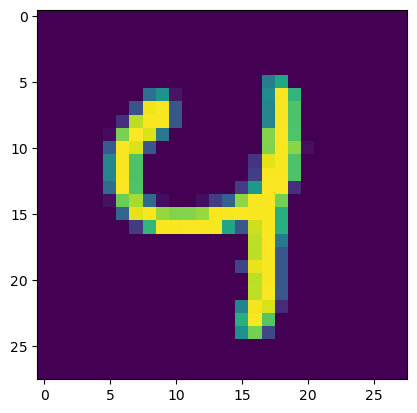

Index: 3681
Predicted class: 8
Actual class: 2


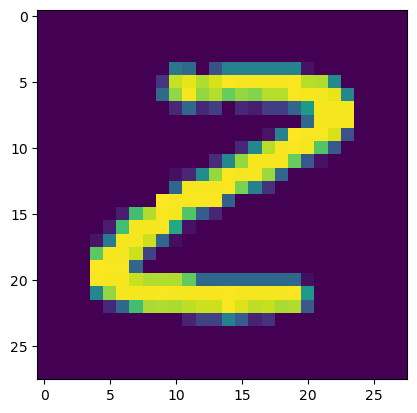

Index: 3702
Predicted class: 4
Actual class: 5


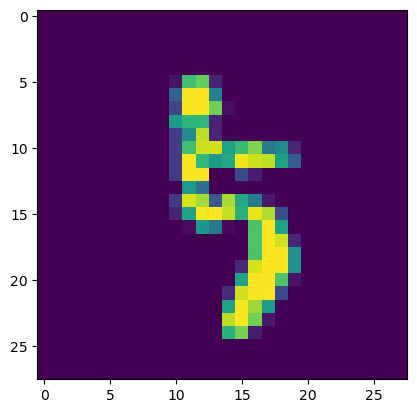

Index: 3767
Predicted class: 2
Actual class: 7


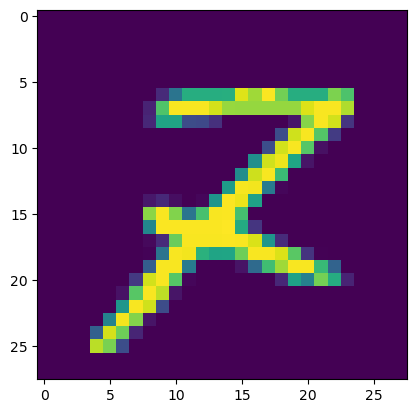

Index: 3780
Predicted class: 6
Actual class: 4


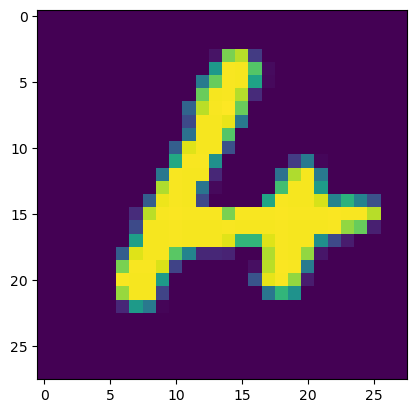

Index: 3808
Predicted class: 8
Actual class: 7


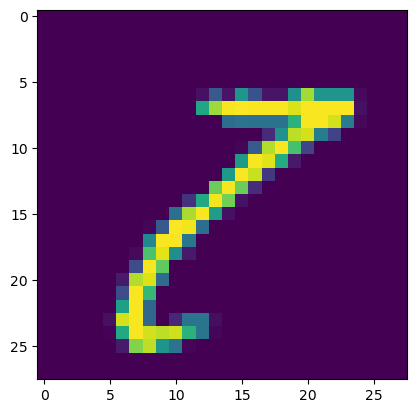

Index: 3811
Predicted class: 3
Actual class: 2


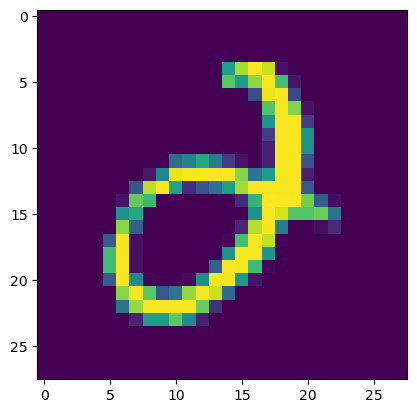

Index: 3838
Predicted class: 1
Actual class: 7


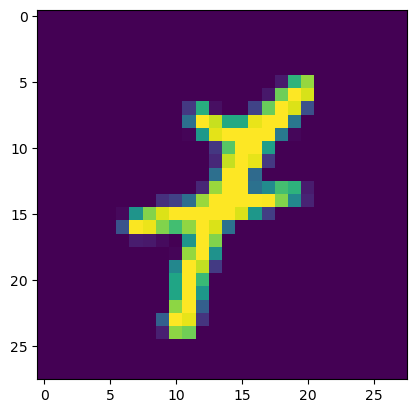

Index: 3853
Predicted class: 5
Actual class: 6


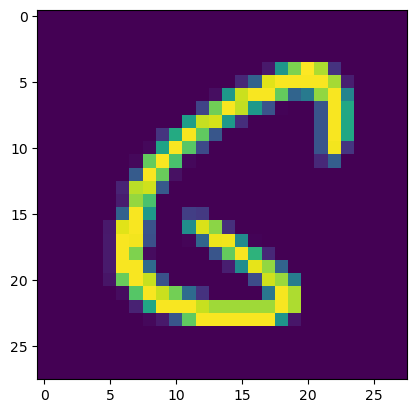

Index: 3893
Predicted class: 6
Actual class: 5


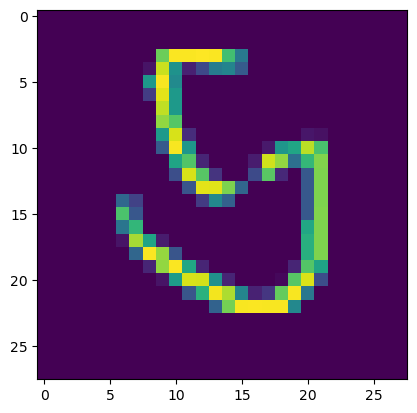

Index: 3941
Predicted class: 2
Actual class: 4


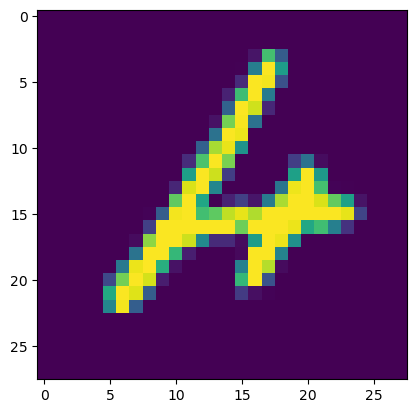

Index: 3968
Predicted class: 3
Actual class: 5


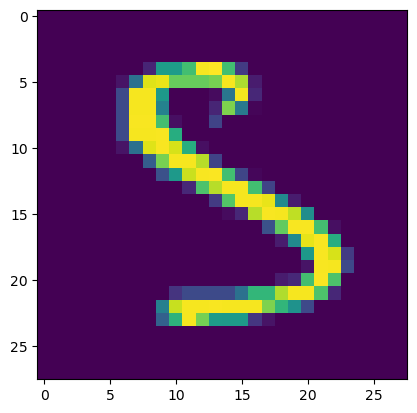

Index: 3976
Predicted class: 1
Actual class: 7


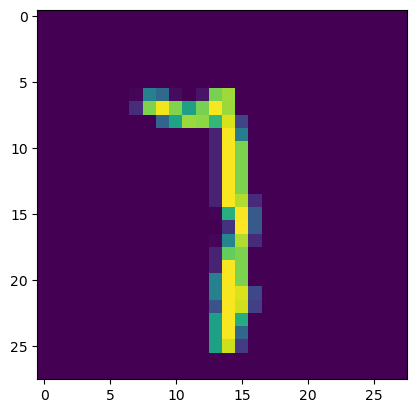

Index: 3985
Predicted class: 4
Actual class: 9


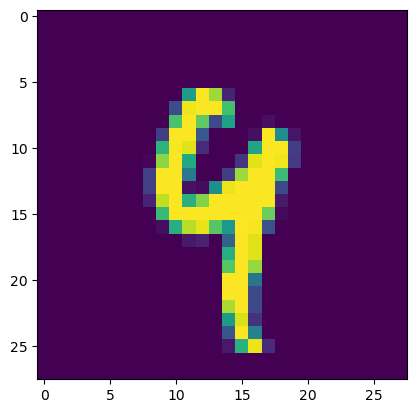

Index: 4015
Predicted class: 3
Actual class: 9


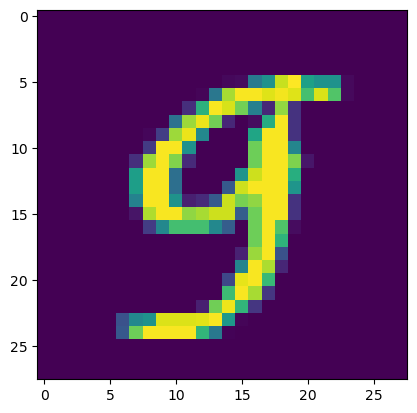

Index: 4065
Predicted class: 2
Actual class: 0


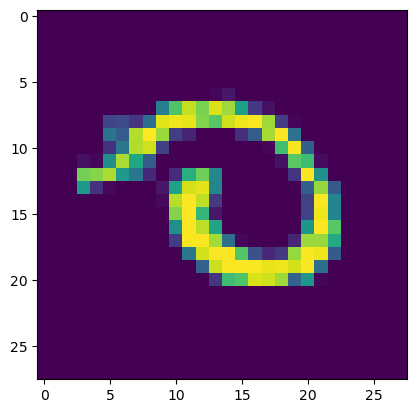

Index: 4078
Predicted class: 8
Actual class: 9


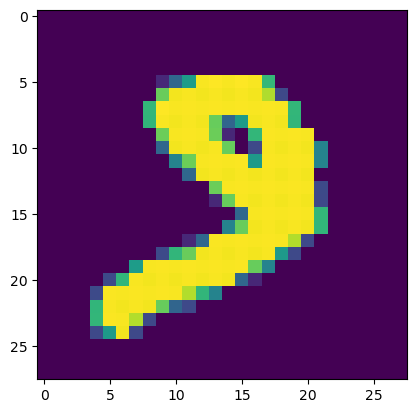

Index: 4123
Predicted class: 2
Actual class: 8


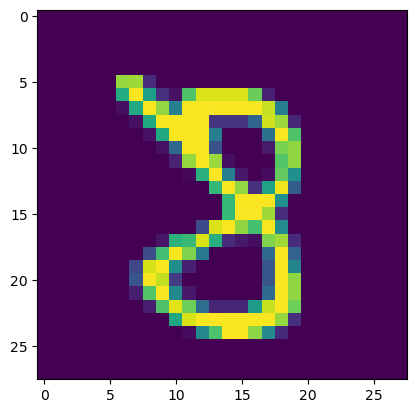

Index: 4159
Predicted class: 3
Actual class: 8


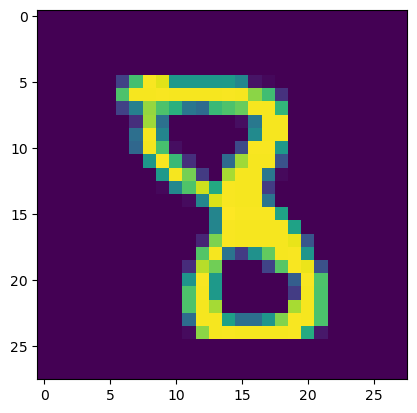

Index: 4163
Predicted class: 5
Actual class: 9


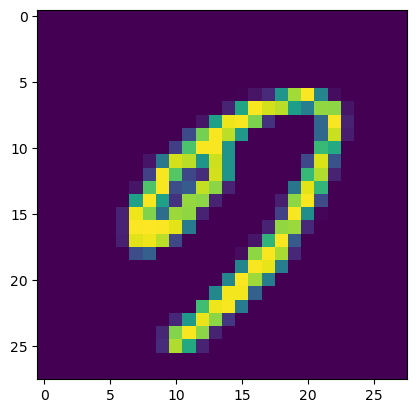

Index: 4176
Predicted class: 8
Actual class: 2


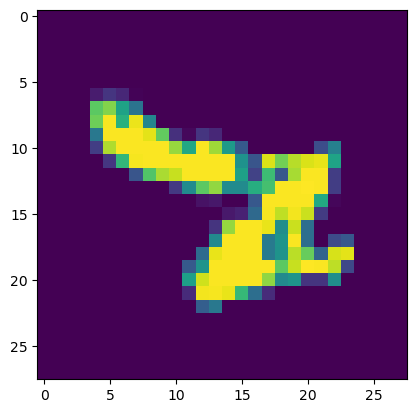

Index: 4199
Predicted class: 9
Actual class: 7


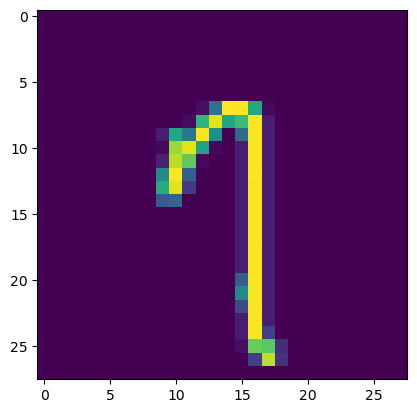

Index: 4201
Predicted class: 7
Actual class: 1


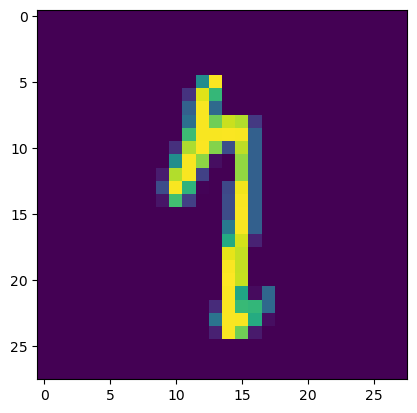

Index: 4271
Predicted class: 3
Actual class: 5


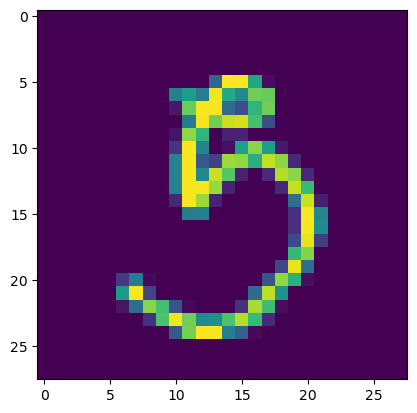

Index: 4294
Predicted class: 5
Actual class: 9


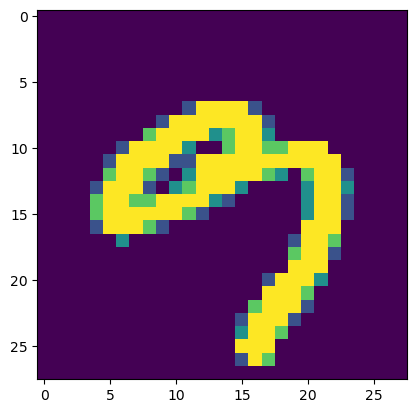

Index: 4360
Predicted class: 9
Actual class: 5


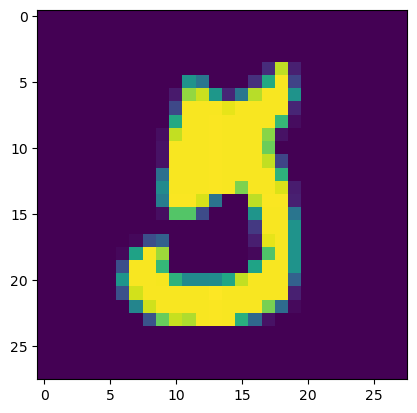

Index: 4369
Predicted class: 4
Actual class: 9


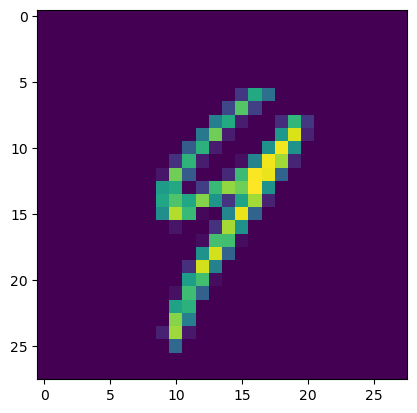

Index: 4437
Predicted class: 2
Actual class: 3


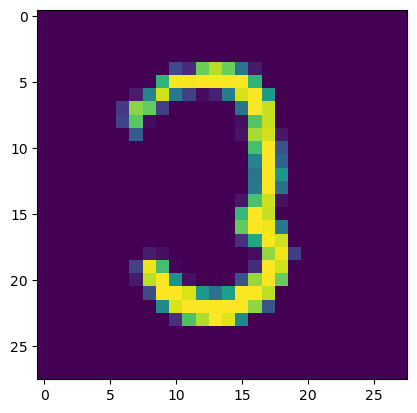

Index: 4443
Predicted class: 2
Actual class: 3


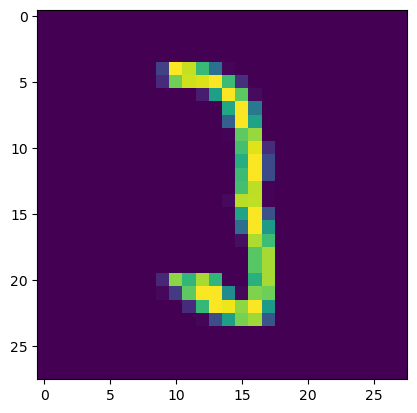

Index: 4497
Predicted class: 7
Actual class: 8


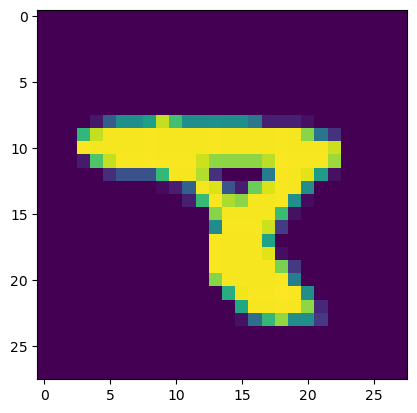

Index: 4504
Predicted class: 7
Actual class: 2


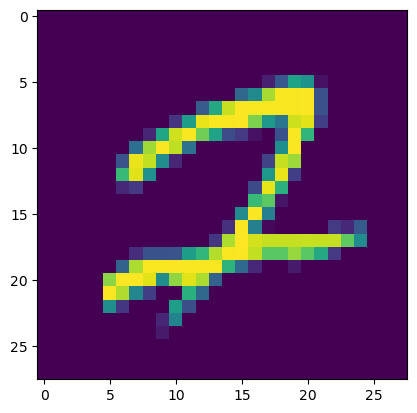

Index: 4536
Predicted class: 5
Actual class: 6


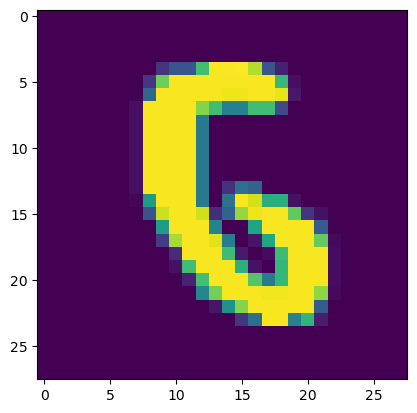

Index: 4571
Predicted class: 2
Actual class: 6


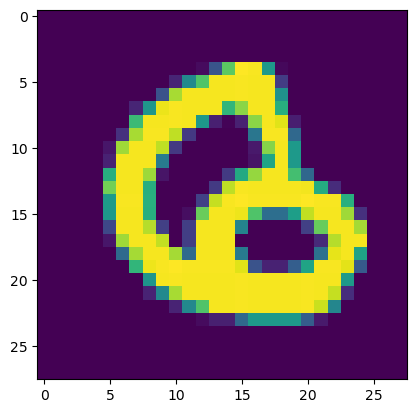

Index: 4619
Predicted class: 5
Actual class: 6


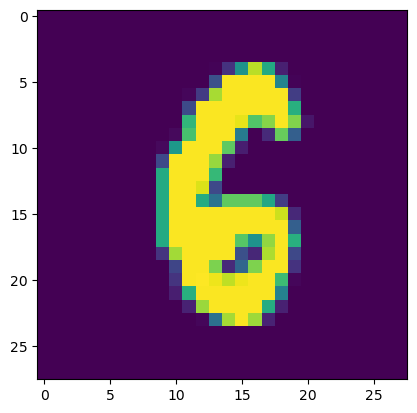

Index: 4639
Predicted class: 9
Actual class: 8


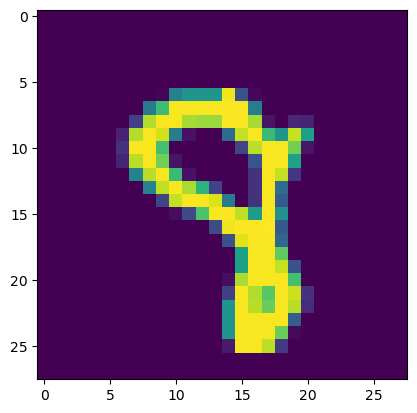

Index: 4690
Predicted class: 2
Actual class: 7


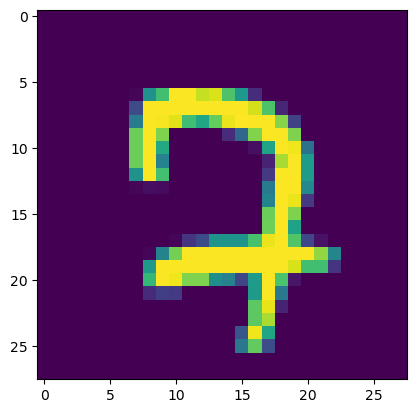

Index: 4814
Predicted class: 4
Actual class: 6


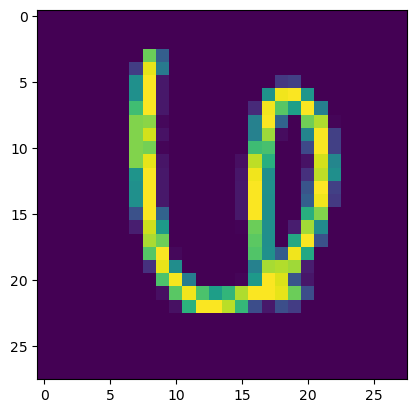

Index: 4823
Predicted class: 4
Actual class: 9


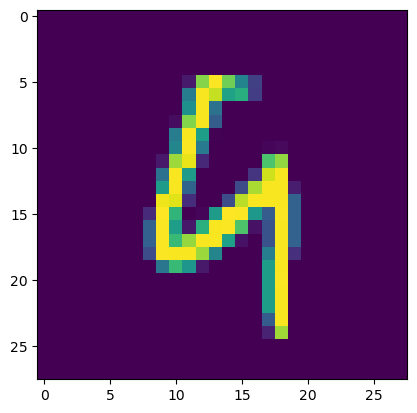

Index: 4837
Predicted class: 2
Actual class: 7


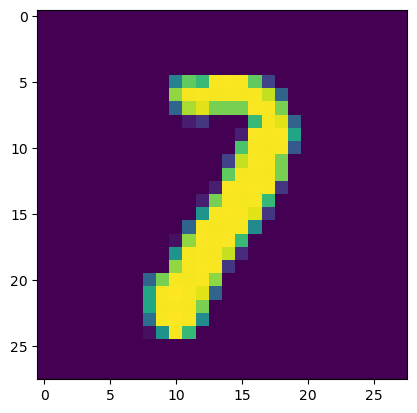

Index: 4860
Predicted class: 9
Actual class: 4


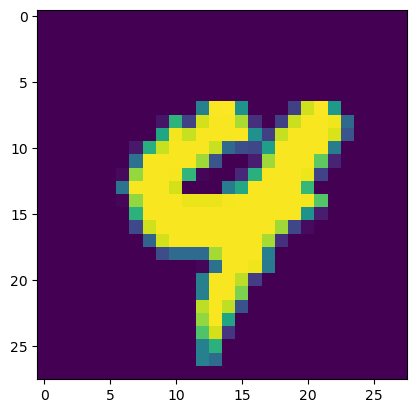

Index: 4880
Predicted class: 8
Actual class: 0


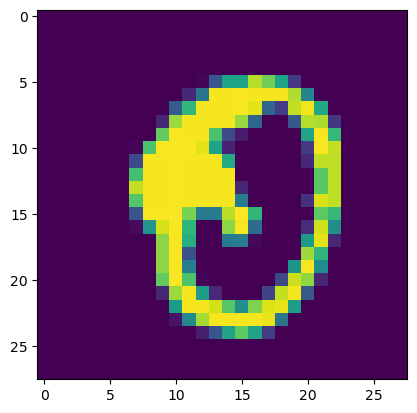

Index: 4966
Predicted class: 4
Actual class: 7


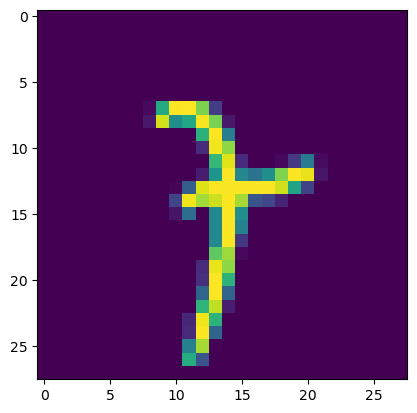

Index: 5176
Predicted class: 4
Actual class: 8


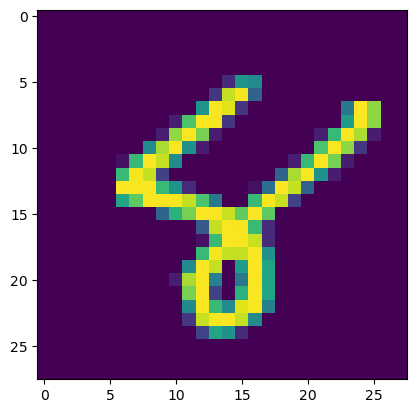

Index: 5199
Predicted class: 4
Actual class: 6


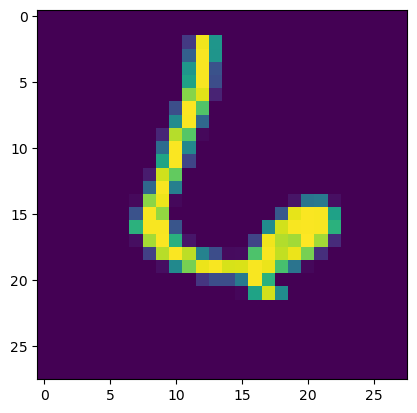

Index: 5331
Predicted class: 6
Actual class: 1


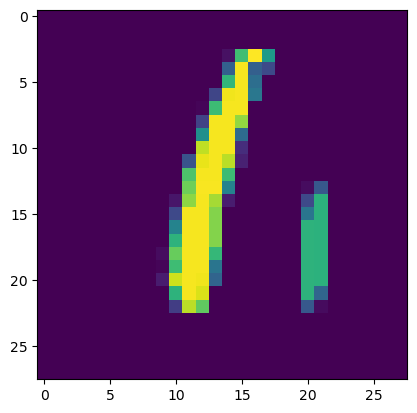

Index: 5450
Predicted class: 5
Actual class: 0


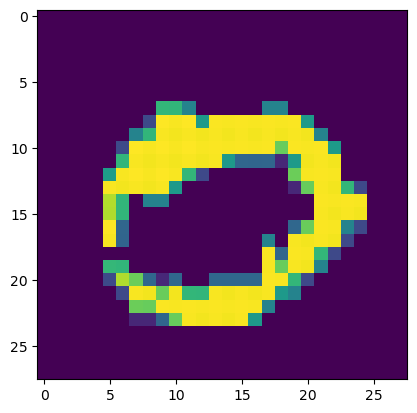

Index: 5457
Predicted class: 8
Actual class: 1


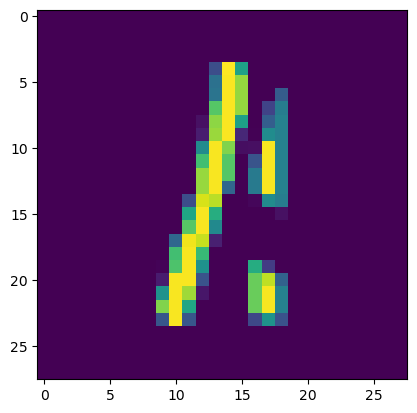

Index: 5642
Predicted class: 8
Actual class: 1


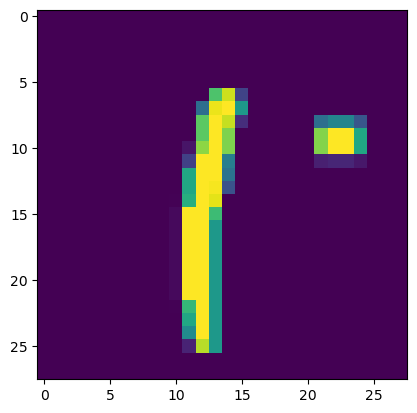

Index: 5676
Predicted class: 2
Actual class: 4


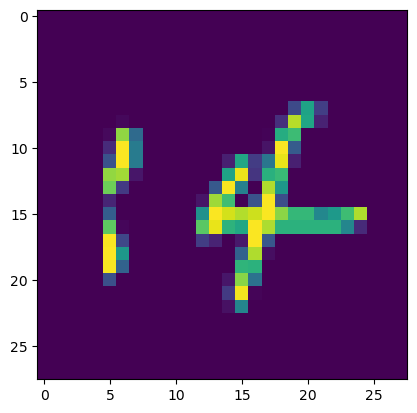

Index: 5734
Predicted class: 2
Actual class: 3


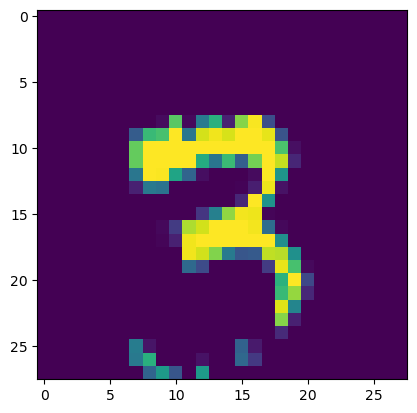

Index: 5936
Predicted class: 9
Actual class: 4


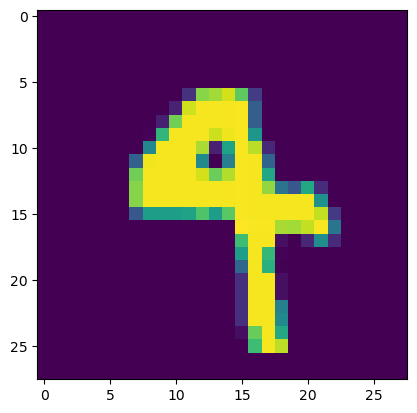

Index: 5937
Predicted class: 3
Actual class: 5


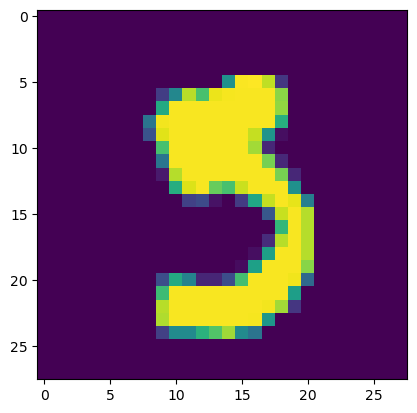

Index: 5955
Predicted class: 8
Actual class: 3


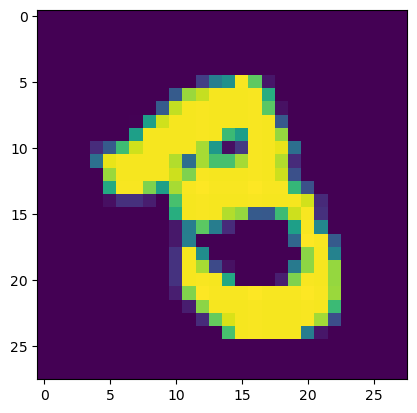

Index: 5973
Predicted class: 8
Actual class: 3


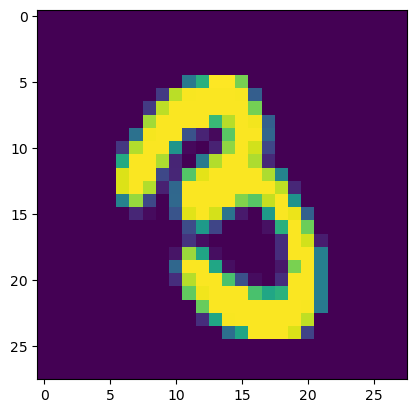

Index: 5982
Predicted class: 3
Actual class: 5


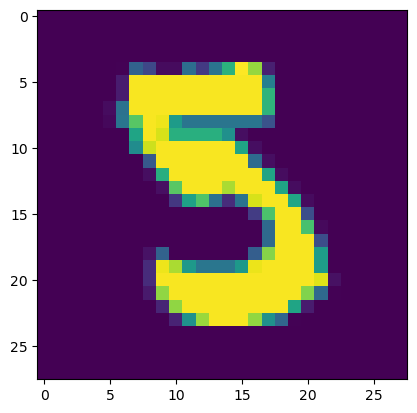

Index: 6011
Predicted class: 0
Actual class: 3


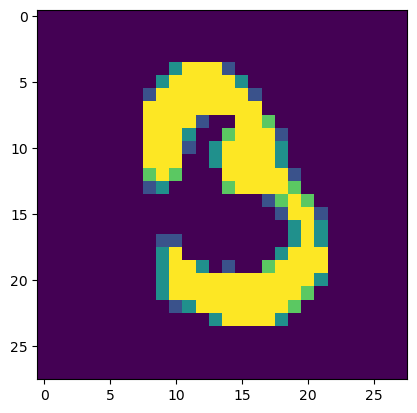

Index: 6059
Predicted class: 0
Actual class: 3


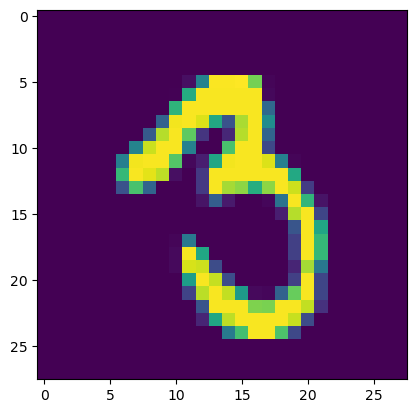

Index: 6166
Predicted class: 3
Actual class: 9


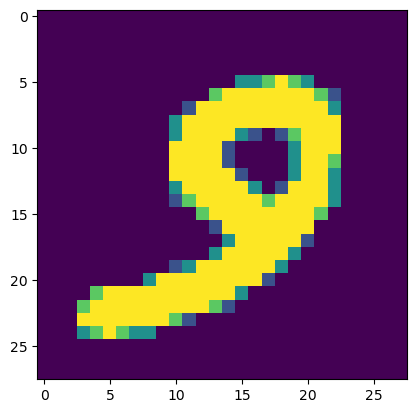

Index: 6370
Predicted class: 2
Actual class: 3


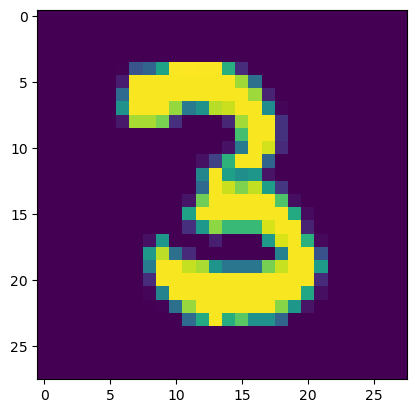

Index: 6421
Predicted class: 2
Actual class: 3


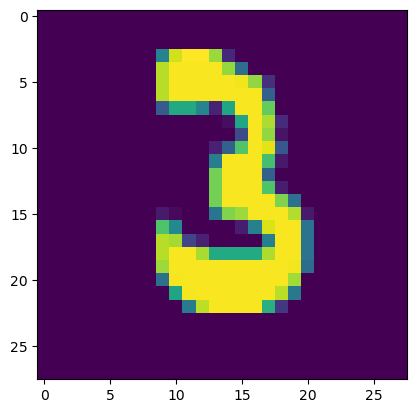

Index: 6555
Predicted class: 9
Actual class: 8


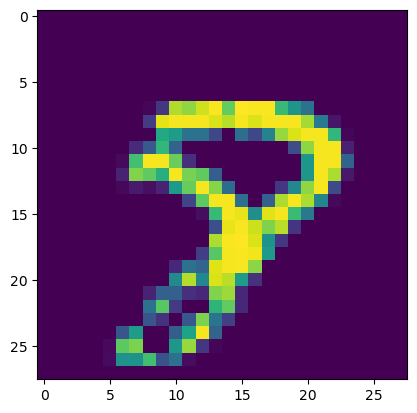

Index: 6560
Predicted class: 8
Actual class: 9


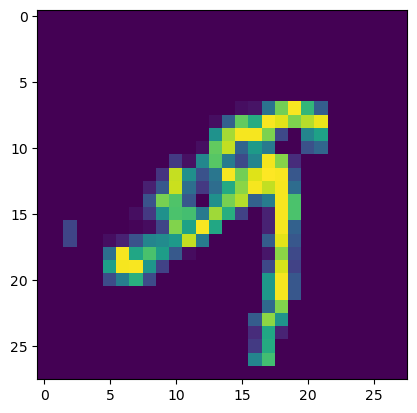

Index: 6597
Predicted class: 7
Actual class: 0


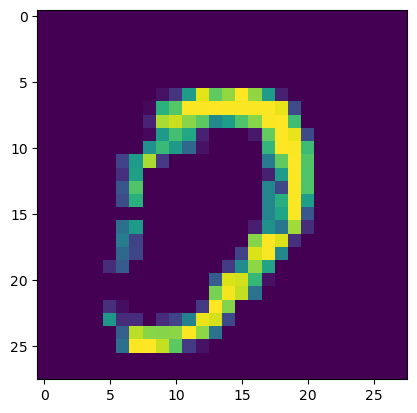

Index: 6625
Predicted class: 2
Actual class: 8


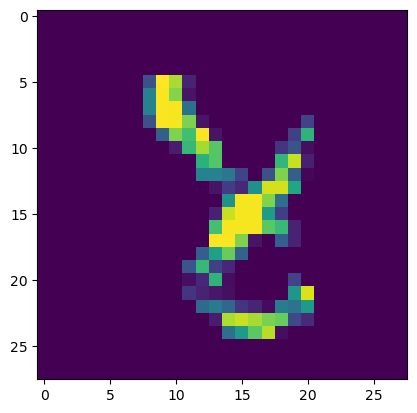

Index: 6632
Predicted class: 5
Actual class: 9


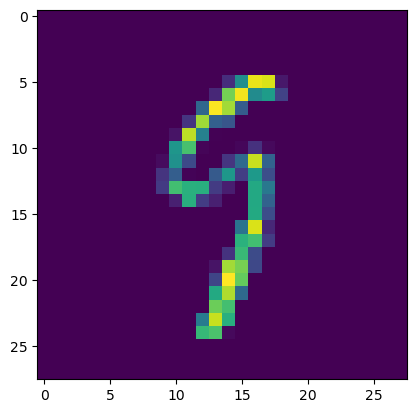

Index: 6641
Predicted class: 5
Actual class: 8


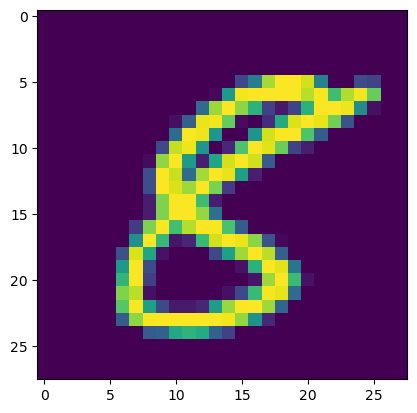

Index: 6651
Predicted class: 1
Actual class: 0


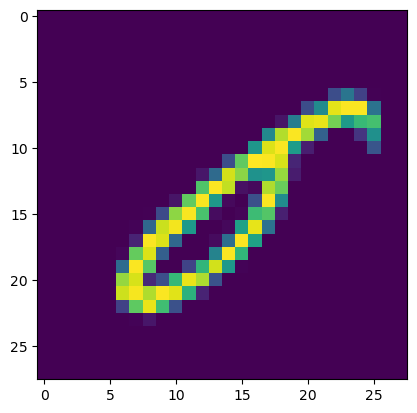

Index: 6755
Predicted class: 9
Actual class: 8


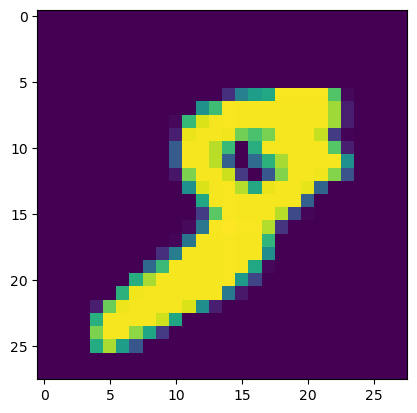

Index: 6783
Predicted class: 6
Actual class: 1


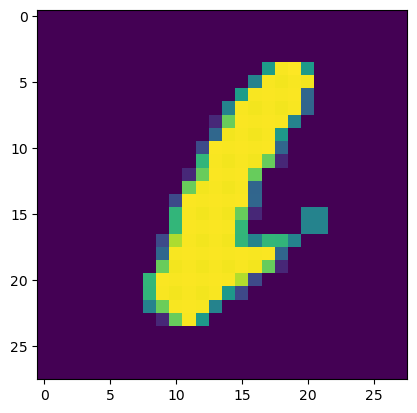

Index: 6817
Predicted class: 4
Actual class: 9


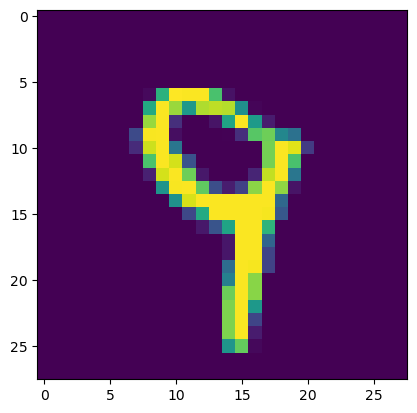

Index: 6847
Predicted class: 4
Actual class: 6


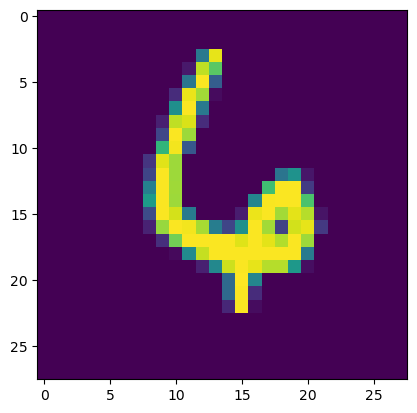

Index: 7216
Predicted class: 3
Actual class: 0


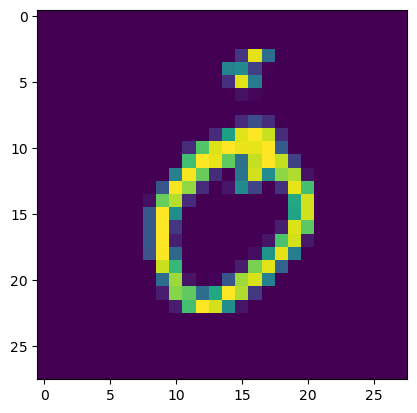

Index: 7233
Predicted class: 5
Actual class: 3


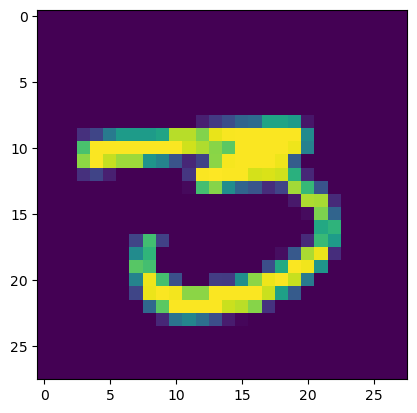

Index: 7823
Predicted class: 2
Actual class: 8


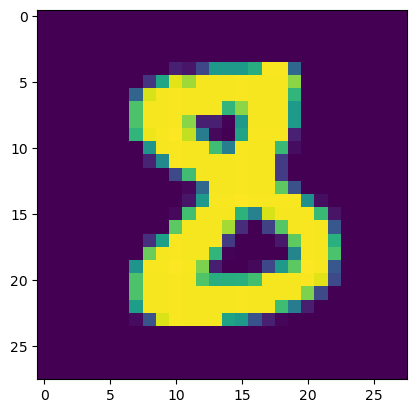

Index: 7842
Predicted class: 8
Actual class: 5


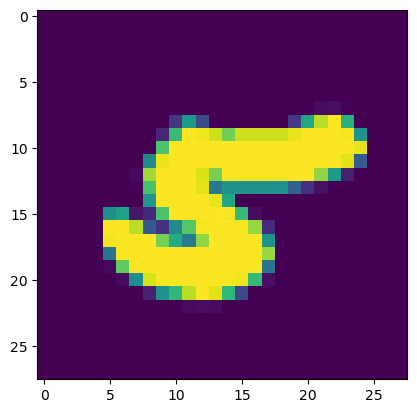

Index: 7921
Predicted class: 2
Actual class: 8


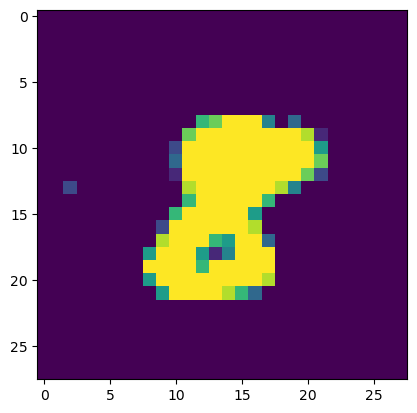

Index: 8094
Predicted class: 8
Actual class: 2


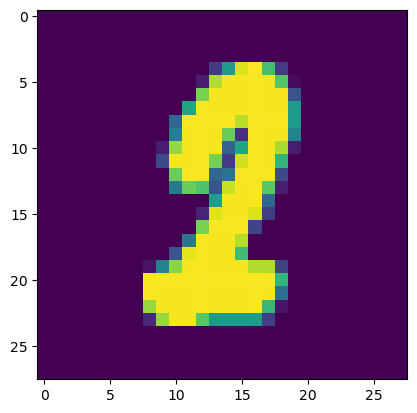

Index: 8279
Predicted class: 4
Actual class: 8


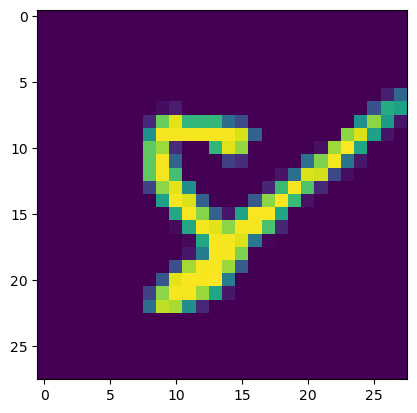

Index: 8316
Predicted class: 2
Actual class: 7


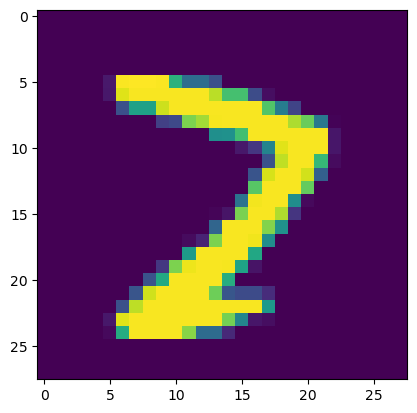

Index: 8397
Predicted class: 5
Actual class: 3


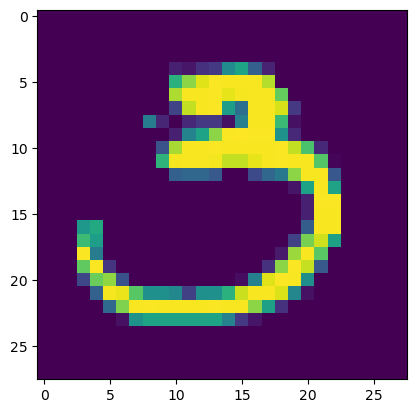

Index: 8522
Predicted class: 2
Actual class: 8


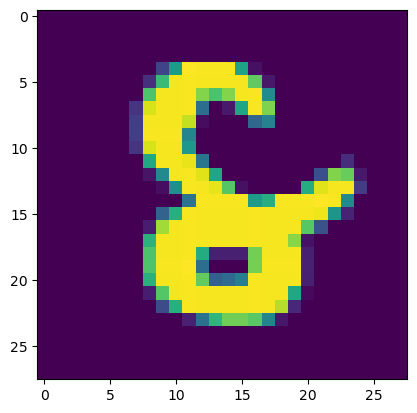

Index: 8527
Predicted class: 9
Actual class: 4


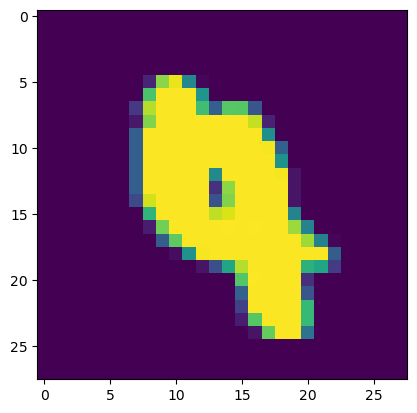

Index: 9009
Predicted class: 2
Actual class: 7


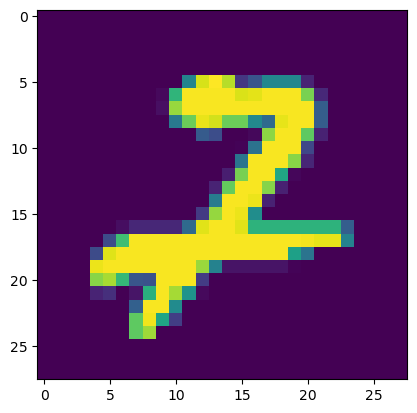

Index: 9024
Predicted class: 2
Actual class: 7


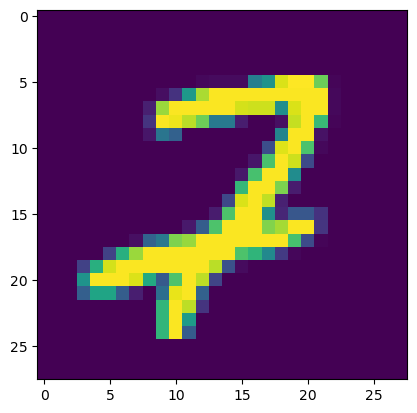

Index: 9280
Predicted class: 5
Actual class: 8


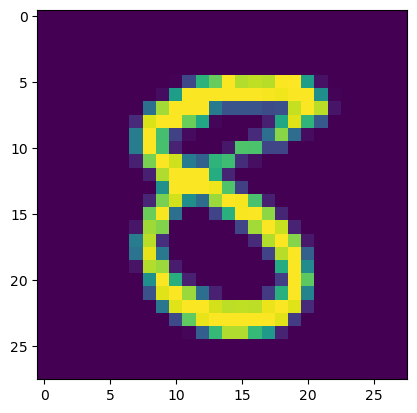

Index: 9342
Predicted class: 2
Actual class: 3


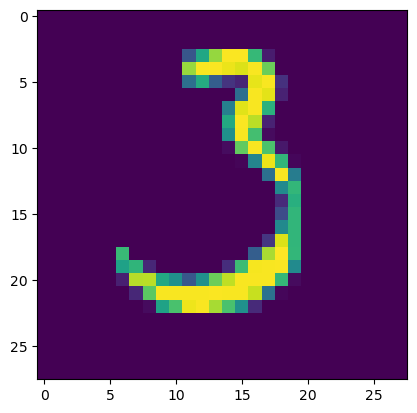

Index: 9587
Predicted class: 4
Actual class: 9


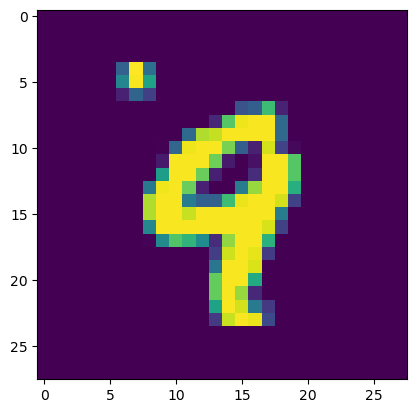

Index: 9664
Predicted class: 7
Actual class: 2


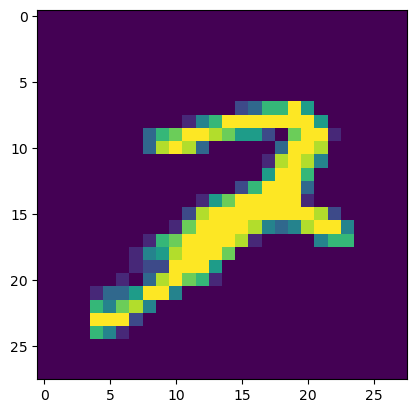

Index: 9679
Predicted class: 3
Actual class: 6


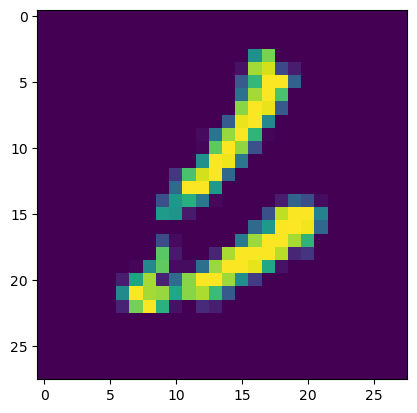

Index: 9701
Predicted class: 7
Actual class: 9


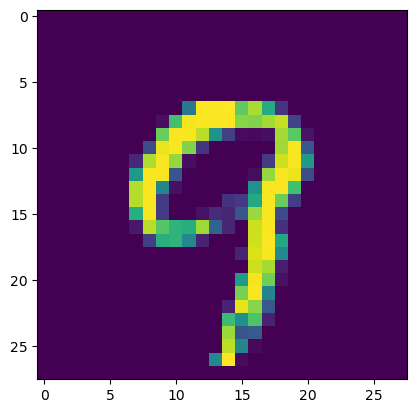

Index: 9729
Predicted class: 6
Actual class: 5


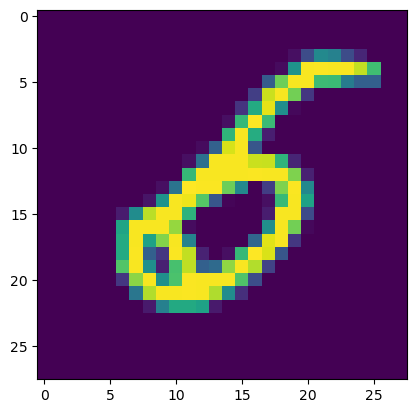

Index: 9762
Predicted class: 8
Actual class: 3


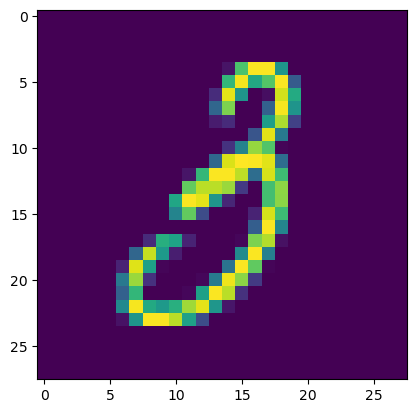

Index: 9770
Predicted class: 0
Actual class: 5


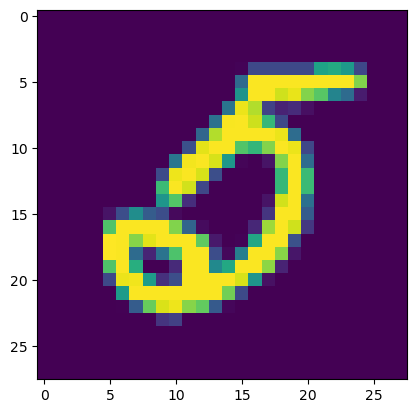

Index: 9782
Predicted class: 5
Actual class: 6


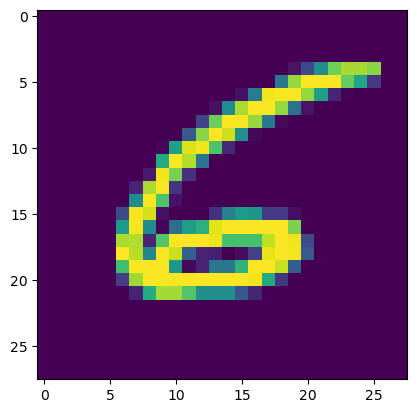

Index: 9808
Predicted class: 4
Actual class: 9


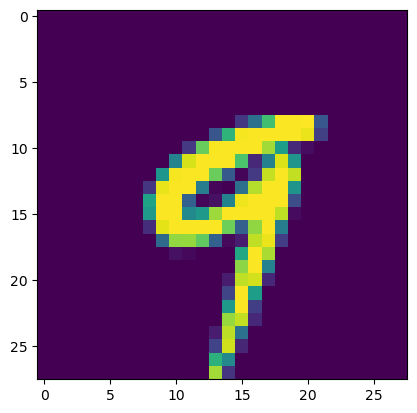

Index: 9839
Predicted class: 3
Actual class: 2


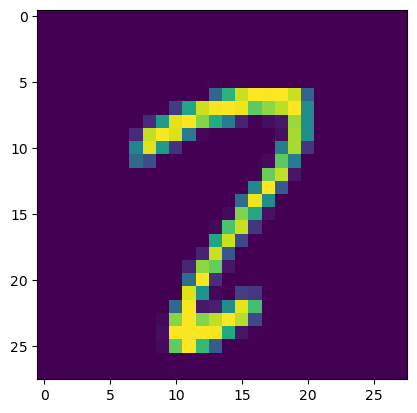

In [471]:
# Prediction for different class on test data
predictions = np.argmax(model.predict(x_test), axis=-1)

# this code will find out the missclassification of classes
misclassified_indices = np.where(predictions != y_test)[0]

# plot the missclassified digit
for index in misclassified_indices:
    print("Index:", index)
    print("Predicted class:", predictions[index])
    print("Actual class:", y_test[index])
    plt.imshow(x_test[index])
    plt.show()
    
